In [6]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


## 101_ACL_Aapps : General Ledger(총계정원장)_43p
---

모든 총계정원장의 계정을 가지는 장부.
대차대조표와 손익계산서는 총계정원장을 근거로 하여 만들어진다.

### Data File

In [0]:
import pandas as pd
import numpy as np
import re

In [0]:
def extract_col(data , pattern):
  
  import re
  
  pattern_list= []
  
  for i in data.columns:
  
    if pattern.search(i):

      pattern_list.append(i)
    
    
  return pattern_list




def Classify_Col(data ,cl_col , agg_col ,agg_type):

  
  Count= data.groupby(cl_col).size()

  PercentofCount = round(Count/Count.sum()*100,2).astype(str)+'%'


  Aggregate = data.groupby(cl_col)[agg_col].agg(agg_type)

  PercentofAggregate = round(abs(Aggregate)/abs(Aggregate).sum()*100,2).astype(str)+'%'


  return pd.concat([Count,PercentofCount,Aggregate,PercentofAggregate],axis=1,keys=['Count','PercentofCount','Aggregate','PercentofAggregate'])




def coltype_verification(data,column): # multiple type check
  
  
  if len(data[column].apply(type).value_counts()) > 1:
    
    print(f'multiple types exist in {column}')

  
  
  

In [0]:

GENERAL_LEDGER_dir = '/content/drive/My Drive/Colab Notebooks/GENERAL_LEDGER.xlsx'

GENERAL_LEDGER = pd.read_excel(GENERAL_LEDGER_dir)

GENERAL_LEDGER.head()

,GL_ACCOUNT,JE_DATE,JOURNAL_ENTRY,MISC_FIELD,TRANS_AMOUNT
0,10000,1996-01-01,JE145,NaN,1000.14
1,78200,1996-01-01,JE145,NaN,1000.25
2,78201,1996-01-01,JE145,NaN,1000.36
3,78202,1996-01-01,JE145,NaN,-3000.75
4,10001,1996-04-25,JE146,NaN,200.78


<br><br>

* GENERAL_LEDGER 데이터의 갯수, 컬럼(필드)값의 타입에 대한 정보를 요약

In [0]:
GENERAL_LEDGER.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 5 columns):
GL_ACCOUNT       44 non-null int64
JE_DATE          44 non-null datetime64[ns]
JOURNAL_ENTRY    44 non-null object
MISC_FIELD       2 non-null float64
TRANS_AMOUNT     44 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 1.8+ KB


>**`GL_ACCOUNT`** : the general ledger account number<br><br>
>
>**`TRANS_AMOUNT`** : the amount of the posted transaction<br><br>
>
>**`JOURNAL_ENTRY`** : the number of the journal entry<br><br>
>
>**`JE_DATE`** : the date of the journal entry<br><br>
>
>**`MISC_FIELD`** : an additional field used to code particular transactions<br><br>

<br><br>
* GENERAL_LEDGER 데이터 중에서 숫자형 데이터를 가지는 필드값의 요약 통계

In [0]:
GENERAL_LEDGER.describe()

,GL_ACCOUNT,MISC_FIELD,TRANS_AMOUNT
count,44.000000,2.000000e+00,44.000000
mean,43036.545455,1.606503e+07,-35.353182
std,34294.924033,1.529868e+05,5756.007496
min,10000.000000,1.595686e+07,-26482.250000
25%,10003.000000,1.601094e+07,-777.770000
50%,18390.000000,1.606503e+07,200.765000
75%,76042.000000,1.611912e+07,1000.277500
max,98556.000000,1.617321e+07,19200.520000


<br>

### **`Application1`** : Stratify general ledger activity for unusual trends and exceptions (_49p)

비정상적인 추세와 예외를 확인하기위해 총계정원장을 계층화하여 정보를 표현.

<br><br><br>


TRANS_AMOUNT를 계층화하여 데이터 count개수와 aggregate값 분포확인

In [0]:
len(GENERAL_LEDGER)

44

In [0]:
bins =[-np.inf,0,100,1000,5000,10000,50000,100000,500000,np.inf]


Count= GENERAL_LEDGER["TRANS_AMOUNT"].groupby(pd.cut(GENERAL_LEDGER['TRANS_AMOUNT'], bins)).count()

PercentofCount = round(Count/Count.sum()*100,2).astype(str)+'%'



Aggregate = GENERAL_LEDGER.groupby(pd.cut(GENERAL_LEDGER['TRANS_AMOUNT'], bins))["TRANS_AMOUNT"].sum()

PercentofAggregate = round(abs(Aggregate)/abs(Aggregate).sum()*100,2).astype(str)+'%'



pd.concat([Count,PercentofCount,Aggregate,PercentofAggregate],axis=1,keys=['Count','PercentofCount','Aggregate','PercentofAggregate'])


,Count,PercentofCount,Aggregate,PercentofAggregate
TRANS_AMOUNT,,,,
"(-inf, 0.0]",20,45.45%,-59847.92,50.66%
"(0.0, 100.0]",0,0.0%,0.00,0.0%
"(100.0, 1000.0]",9,20.45%,3282.31,2.78%
"(1000.0, 5000.0]",12,27.27%,18608.17,15.75%
"(5000.0, 10000.0]",1,2.27%,7200.89,6.1%
"(10000.0, 50000.0]",2,4.55%,29201.01,24.72%
"(50000.0, 100000.0]",0,0.0%,0.00,0.0%
"(100000.0, 500000.0]",0,0.0%,0.00,0.0%
"(500000.0, inf]",0,0.0%,0.00,0.0%


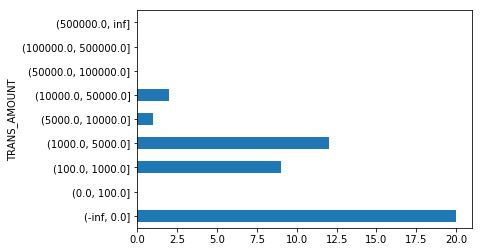

In [0]:
Count.plot(kind='barh')

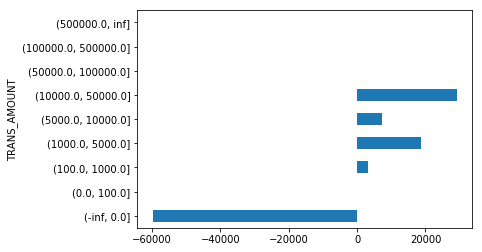

In [0]:
Aggregate.plot(kind='barh')

<br><br>

TRANS_AMOUNT를 계층화하여 데이터 count개수와 TRANS_AMOUNT aggregate값 분포확인

In [0]:
bins =pd.date_range("1995-12-31","1997-01-01", freq='1M')



Count= GENERAL_LEDGER["JE_DATE"].groupby(pd.cut(GENERAL_LEDGER['JE_DATE'], bins)).count()

PercentofCount = round(Count/Count.sum()*100,2).astype(str)+'%'



Aggregate = GENERAL_LEDGER.groupby(pd.cut(GENERAL_LEDGER['JE_DATE'], bins))["TRANS_AMOUNT"].sum()

PercentofAggregate = round(abs(Aggregate)/abs(Aggregate).sum()*100,2).astype(str)+'%'




pd.concat([Count,PercentofCount,Aggregate,PercentofAggregate],axis=1,keys=['Count','PercentofCount','Aggregate','PercentofAggregate'])

,Count,PercentofCount,Aggregate,PercentofAggregate
JE_DATE,,,,
"(1995-12-31, 1996-01-31]",4,9.09%,0.000000e+00,0.0%
"(1996-01-31, 1996-02-29]",0,0.0%,0.000000e+00,0.0%
"(1996-02-29, 1996-03-31]",0,0.0%,0.000000e+00,0.0%
"(1996-03-31, 1996-04-30]",11,25.0%,0.000000e+00,0.0%
"(1996-04-30, 1996-05-31]",0,0.0%,0.000000e+00,0.0%
"(1996-05-31, 1996-06-30]",0,0.0%,0.000000e+00,0.0%
"(1996-06-30, 1996-07-31]",6,13.64%,-6.594725e-14,0.0%
"(1996-07-31, 1996-08-31]",0,0.0%,0.000000e+00,0.0%
"(1996-08-31, 1996-09-30]",13,29.55%,0.000000e+00,0.0%


Text(0.5, 0, 'Aggregate of TRANS_AMOUNT')

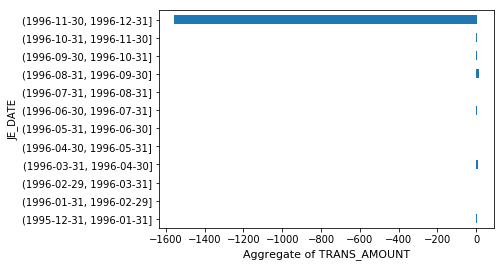

In [0]:
plt=Count.plot(kind='barh')
plt.set_xlabel('Count', fontsize=11)


plt =Aggregate.plot(kind='barh')

plt.set_xlabel('Aggregate of TRANS_AMOUNT', fontsize=11)

#### Audit Steps

* 비합리적으로 큰 수치(TRANS_AMOUNT)에 대해서 재계산하거나 적절한 분류가 이루어졌는지 체크.

* 높은 거래건수 & 낮은 TRANS_AMOUNT를 가지는 데이터에 대해서 분류의 적절성을 검토.

* 1달 간격의 데이터 집계를 통해 잠재적인 오류나 회계부정을 감지할수도있다.

* stratification percentages를 통해 감사 커버리지를 통제하여 기록된 사실을 확인할 수 있다.

<br><br>

### **`Application2`** : "Flatten" journal entries into one record to extract repetitive and unique journal entries(_53p)

#### **CREDITS**

대변항목에 해당되는 데이터만 추출

In [0]:
CREDITS = GENERAL_LEDGER[GENERAL_LEDGER['TRANS_AMOUNT']<0]
len(CREDITS)

20

In [0]:
CREDITS.groupby('JOURNAL_ENTRY').agg(sum)['TRANS_AMOUNT']

JOURNAL_ENTRY
JE145    -3000.75
JE146    -1702.39
JE147   -10000.49
JE148     -802.15
JE150   -30502.09
JE151    -3000.75
JE153    -1842.25
JE154    -1842.25
JE155    -4821.49
JE156    -2333.31
Name: TRANS_AMOUNT, dtype: float64

#### **DEBITS**

차변항목에 해당되는 데이터만 추출

In [0]:
DEBITS = GENERAL_LEDGER[GENERAL_LEDGER['TRANS_AMOUNT']>0]
len(DEBITS)

24

In [0]:
DEBITS.groupby('JOURNAL_ENTRY').agg(sum)['TRANS_AMOUNT']

JOURNAL_ENTRY
JE145     3000.75
JE146     1702.39
JE147    10000.49
JE148      802.15
JE150    30502.09
JE151     3000.75
JE153     1842.25
JE154     1842.25
JE155     4821.49
JE156      777.77
Name: TRANS_AMOUNT, dtype: float64


#### **FLAT_JOURNALS**

각각의 분개를 하나의 레코드로 표현

    - TRANS_AMOUNT

In [0]:
# 총계정원장에서 분개장번호의 고유값들을 추출
GL_ACCOUNT_UNIQUE = GENERAL_LEDGER['JOURNAL_ENTRY'].unique()



for series_name in GL_ACCOUNT_UNIQUE:
  
    #  분개장번호를 Series 이름으로 하여 Series를 생성
    globals()[series_name] = pd.Series([])
    globals()[series_name].name = str(series_name)
    
    # 총계정원장에서 해당 루프의 분개장번호와 일치하는 데이터에서 TRANS_AMOUNT 컬럼값을 추출
    aa = GENERAL_LEDGER[GENERAL_LEDGER['JOURNAL_ENTRY']== series_name]['TRANS_AMOUNT']

    
    Dr_i = 0
    Cr_i = 0
    
    
    for j in aa:
             
        #컬럼값이 0보다 작으면 
        if j < 0:
            
            # 위에서 생성한 분개장 번호Series인덱스를 'TRANS_AMOUNT_Cr1 , TRANS_AMOUNT_Cr2 ,.... 로 만들고 컬럼값을 넣어준다.
            name = 'TRANS_AMOUNT_Cr{}'.format(Cr_i+1)
            
            globals()[series_name][name] = j
    
            Cr_i = Cr_i + 1
            
        else:
             
            # 위에서 생성한 분개장 번호Series인덱스를 'TRANS_AMOUNT_Dr1 , TRANS_AMOUNT_Dr2 ,.... 로 만들고 컬럼값을 넣어준다.
            name = 'TRANS_AMOUNT_Dr{}'.format(Dr_i+1)
            
            globals()[series_name][name] = j
            
            Dr_i = Dr_i + 1
    
    # 결국 하나의 Series(ex.JE145) 안에 여러 인덱스(TRANS_AMOUNT_Cr1 , TRANS_AMOUNT_Cr2,TRANS_AMOUNT_Dr1 , TRANS_AMOUNT_Dr2)를 가진 객체가 만들어진다. 

In [0]:

m=[]
for i in GL_ACCOUNT_UNIQUE:
    m.append(i)
print(m)

['JE145', 'JE146', 'JE147', 'JE148', 'JE150', 'JE151', 'JE153', 'JE154', 'JE155', 'JE156']


In [0]:
import pandas as pd


#생성한 Series 객체를 병합시킨다.
TRANS_AMOUNT_COL = pd.concat([JE145, JE146, JE147, JE148, JE150, JE151, JE153, JE154, JE155, JE156],axis=1 ,sort=True)
#nan값을 0으로 대체 (동일한 인덱스를 가지지 않는 데이터는 nan값으로 표시되는데 이후 집계를 위해 0으로 대체한다.)
TRANS_AMOUNT_COL_F = TRANS_AMOUNT_COL.T.fillna(0)

TRANS_AMOUNT_COL_F

,TRANS_AMOUNT_Cr1,TRANS_AMOUNT_Cr2,TRANS_AMOUNT_Cr3,TRANS_AMOUNT_Cr4,TRANS_AMOUNT_Dr1,TRANS_AMOUNT_Dr2,TRANS_AMOUNT_Dr3,TRANS_AMOUNT_Dr4,TRANS_AMOUNT_Dr5
JE145,-3000.75,0.00,0.00,0.00,1000.14,1000.25,1000.36,0.00,0.00
JE146,-500.67,-400.55,-200.59,-600.58,200.78,400.02,200.25,500.45,400.89
JE147,-10000.49,0.00,0.00,0.00,10000.49,0.00,0.00,0.00,0.00
JE148,-500.98,-300.16,-1.01,0.00,200.84,400.56,200.75,0.00,0.00
JE150,-26482.25,-400.55,-2800.65,-818.64,1400.28,1200.02,19200.52,1500.38,7200.89
JE151,-3000.75,0.00,0.00,0.00,1000.14,1000.25,1000.36,0.00,0.00
JE153,-1842.25,0.00,0.00,0.00,1842.25,0.00,0.00,0.00,0.00
JE154,-1842.25,0.00,0.00,0.00,1842.25,0.00,0.00,0.00,0.00
JE155,-4821.49,0.00,0.00,0.00,4821.49,0.00,0.00,0.00,0.00
JE156,-777.77,-777.77,-777.77,0.00,777.77,0.00,0.00,0.00,0.00


\- GL_ACCOUNT

In [0]:
GL_ACCOUNT_UNIQUE = GENERAL_LEDGER['JOURNAL_ENTRY'].unique()



for series_name in GL_ACCOUNT_UNIQUE:
    
    globals()[series_name] = pd.Series([])
    globals()[series_name].name = str(series_name)
    
    
    aa = GENERAL_LEDGER[GENERAL_LEDGER['JOURNAL_ENTRY']== series_name]['GL_ACCOUNT']
    bb = GENERAL_LEDGER[GENERAL_LEDGER['JOURNAL_ENTRY']== series_name]['TRANS_AMOUNT']
    
    Dr_i = 0
    Cr_i = 0

    
    for a,b in zip(aa,bb):
            
      
        if b < 0:
          

            name = 'GL_ACCOUNTCr{}'.format(Cr_i+1)
            
            globals()[series_name][name] = a

            
            Cr_i = Cr_i + 1
            
        else:
  
          
            name = 'GL_ACCOUNTDr{}'.format(Dr_i+1)
            
            globals()[series_name][name] = a
                

            Dr_i = Dr_i + 1

In [0]:
GL_ACCOUNT_COL = pd.concat([JE145, JE146, JE147, JE148, JE150, JE151, JE153, JE154, JE155, JE156],axis=1 ,sort=True)
GL_ACCOUNT_COL_F = GL_ACCOUNT_COL.T

GL_ACCOUNT_COL_F

,GL_ACCOUNTCr1,GL_ACCOUNTCr2,GL_ACCOUNTCr3,GL_ACCOUNTCr4,GL_ACCOUNTDr1,GL_ACCOUNTDr2,GL_ACCOUNTDr3,GL_ACCOUNTDr4,GL_ACCOUNTDr5
JE145,78202.0,NaN,NaN,NaN,10000.0,78200.0,78201.0,NaN,NaN
JE146,76040.0,76041.0,76041.0,76042.0,10001.0,10002.0,10003.0,10004.0,10005.0
JE147,10001.0,NaN,NaN,NaN,72554.0,NaN,NaN,NaN,NaN
JE148,10442.0,10551.0,10942.0,NaN,10001.0,10002.0,10003.0,NaN,NaN
JE150,76040.0,76041.0,76041.0,76042.0,10001.0,10002.0,10003.0,10004.0,10005.0
JE151,78202.0,NaN,NaN,NaN,10000.0,78200.0,78201.0,NaN,NaN
JE153,84220.0,NaN,NaN,NaN,22001.0,NaN,NaN,NaN,NaN
JE154,84225.0,NaN,NaN,NaN,84220.0,NaN,NaN,NaN,NaN
JE155,10001.0,NaN,NaN,NaN,72554.0,NaN,NaN,NaN,NaN
JE156,14779.0,68547.0,98556.0,NaN,12445.0,NaN,NaN,NaN,NaN


In [0]:

#생성된 두개의 데이터프레임을 병합시킨다. (동일한 인덱스를 가지므로 쉽게 병합이 가능)

FLAT_JOURNALS =pd.concat([TRANS_AMOUNT_COL_F,GL_ACCOUNT_COL_F],axis=1)

In [0]:
#nan 값 공백으로 처리
FLAT_JOURNALS = FLAT_JOURNALS.replace(np.nan,' ', regex=True)

In [0]:
#컬럼명 순서 재정렬
len(FLAT_JOURNALS.columns)


re_sort = ['GL_ACCOUNTDr1', 'GL_ACCOUNTDr2', 'GL_ACCOUNTDr3', 'GL_ACCOUNTDr4','GL_ACCOUNTDr5',
'TRANS_AMOUNT_Dr1', 'TRANS_AMOUNT_Dr2','TRANS_AMOUNT_Dr3', 'TRANS_AMOUNT_Dr4', 'TRANS_AMOUNT_Dr5',
'GL_ACCOUNTCr1', 'GL_ACCOUNTCr2', 'GL_ACCOUNTCr3', 'GL_ACCOUNTCr4',
'TRANS_AMOUNT_Cr1', 'TRANS_AMOUNT_Cr2', 'TRANS_AMOUNT_Cr3','TRANS_AMOUNT_Cr4']


len(FLAT_JOURNALS[re_sort].columns)


FLAT_JOURNALS = FLAT_JOURNALS[re_sort]

FLAT_JOURNALS

,GL_ACCOUNTDr1,GL_ACCOUNTDr2,GL_ACCOUNTDr3,GL_ACCOUNTDr4,GL_ACCOUNTDr5,TRANS_AMOUNT_Dr1,TRANS_AMOUNT_Dr2,TRANS_AMOUNT_Dr3,TRANS_AMOUNT_Dr4,TRANS_AMOUNT_Dr5,GL_ACCOUNTCr1,GL_ACCOUNTCr2,GL_ACCOUNTCr3,GL_ACCOUNTCr4,TRANS_AMOUNT_Cr1,TRANS_AMOUNT_Cr2,TRANS_AMOUNT_Cr3,TRANS_AMOUNT_Cr4
JE145,10000.0,78200,78201,,,1000.14,1000.25,1000.36,0.00,0.00,78202.0,,,,-3000.75,0.00,0.00,0.00
JE146,10001.0,10002,10003,10004,10005,200.78,400.02,200.25,500.45,400.89,76040.0,76041,76041,76042,-500.67,-400.55,-200.59,-600.58
JE147,72554.0,,,,,10000.49,0.00,0.00,0.00,0.00,10001.0,,,,-10000.49,0.00,0.00,0.00
JE148,10001.0,10002,10003,,,200.84,400.56,200.75,0.00,0.00,10442.0,10551,10942,,-500.98,-300.16,-1.01,0.00
JE150,10001.0,10002,10003,10004,10005,1400.28,1200.02,19200.52,1500.38,7200.89,76040.0,76041,76041,76042,-26482.25,-400.55,-2800.65,-818.64
JE151,10000.0,78200,78201,,,1000.14,1000.25,1000.36,0.00,0.00,78202.0,,,,-3000.75,0.00,0.00,0.00
JE153,22001.0,,,,,1842.25,0.00,0.00,0.00,0.00,84220.0,,,,-1842.25,0.00,0.00,0.00
JE154,84220.0,,,,,1842.25,0.00,0.00,0.00,0.00,84225.0,,,,-1842.25,0.00,0.00,0.00
JE155,72554.0,,,,,4821.49,0.00,0.00,0.00,0.00,10001.0,,,,-4821.49,0.00,0.00,0.00
JE156,12445.0,,,,,777.77,0.00,0.00,0.00,0.00,14779.0,68547,98556,,-777.77,-777.77,-777.77,0.00


#### FLJDR

차변 정보만을 추출

In [0]:
FLAT_JOURNALS.columns

Index(['GL_ACCOUNTDr1', 'GL_ACCOUNTDr2', 'GL_ACCOUNTDr3', 'GL_ACCOUNTDr4',
       'GL_ACCOUNTDr5', 'TRANS_AMOUNT_Dr1', 'TRANS_AMOUNT_Dr2',
       'TRANS_AMOUNT_Dr3', 'TRANS_AMOUNT_Dr4', 'TRANS_AMOUNT_Dr5',
       'GL_ACCOUNTCr1', 'GL_ACCOUNTCr2', 'GL_ACCOUNTCr3', 'GL_ACCOUNTCr4',
       'TRANS_AMOUNT_Cr1', 'TRANS_AMOUNT_Cr2', 'TRANS_AMOUNT_Cr3',
       'TRANS_AMOUNT_Cr4'],
      dtype='object')

In [0]:

#사용자정의함수 extract_col()을 이용하여 해당패턴에 부합하는 컬럼명 추출
  
pattern = re.compile('(Dr\d+)')  
pattern_list = extract_col(FLAT_JOURNALS,pattern)

pattern_list



['GL_ACCOUNTDr1',
 'GL_ACCOUNTDr2',
 'GL_ACCOUNTDr3',
 'GL_ACCOUNTDr4',
 'GL_ACCOUNTDr5',
 'TRANS_AMOUNT_Dr1',
 'TRANS_AMOUNT_Dr2',
 'TRANS_AMOUNT_Dr3',
 'TRANS_AMOUNT_Dr4',
 'TRANS_AMOUNT_Dr5']

In [0]:
FLJDR = FLAT_JOURNALS[pattern_list]

FLJDR

,GL_ACCOUNTDr1,GL_ACCOUNTDr2,GL_ACCOUNTDr3,GL_ACCOUNTDr4,GL_ACCOUNTDr5,TRANS_AMOUNT_Dr1,TRANS_AMOUNT_Dr2,TRANS_AMOUNT_Dr3,TRANS_AMOUNT_Dr4,TRANS_AMOUNT_Dr5
JE145,10000.0,78200,78201,,,1000.14,1000.25,1000.36,0.00,0.00
JE146,10001.0,10002,10003,10004,10005,200.78,400.02,200.25,500.45,400.89
JE147,72554.0,,,,,10000.49,0.00,0.00,0.00,0.00
JE148,10001.0,10002,10003,,,200.84,400.56,200.75,0.00,0.00
JE150,10001.0,10002,10003,10004,10005,1400.28,1200.02,19200.52,1500.38,7200.89
JE151,10000.0,78200,78201,,,1000.14,1000.25,1000.36,0.00,0.00
JE153,22001.0,,,,,1842.25,0.00,0.00,0.00,0.00
JE154,84220.0,,,,,1842.25,0.00,0.00,0.00,0.00
JE155,72554.0,,,,,4821.49,0.00,0.00,0.00,0.00
JE156,12445.0,,,,,777.77,0.00,0.00,0.00,0.00


#### FLJCR

대변 정보만을 추출

In [0]:

pattern = re.compile('(Cr\d+)')  
pattern_list = extract_col(FLAT_JOURNALS,pattern)

pattern_list


['GL_ACCOUNTCr1',
 'GL_ACCOUNTCr2',
 'GL_ACCOUNTCr3',
 'GL_ACCOUNTCr4',
 'TRANS_AMOUNT_Cr1',
 'TRANS_AMOUNT_Cr2',
 'TRANS_AMOUNT_Cr3',
 'TRANS_AMOUNT_Cr4']

In [0]:
FLJCR = FLAT_JOURNALS[pattern_list]

FLJCR

,GL_ACCOUNTCr1,GL_ACCOUNTCr2,GL_ACCOUNTCr3,GL_ACCOUNTCr4,TRANS_AMOUNT_Cr1,TRANS_AMOUNT_Cr2,TRANS_AMOUNT_Cr3,TRANS_AMOUNT_Cr4
JE145,78202.0,,,,-3000.75,0.00,0.00,0.00
JE146,76040.0,76041,76041,76042,-500.67,-400.55,-200.59,-600.58
JE147,10001.0,,,,-10000.49,0.00,0.00,0.00
JE148,10442.0,10551,10942,,-500.98,-300.16,-1.01,0.00
JE150,76040.0,76041,76041,76042,-26482.25,-400.55,-2800.65,-818.64
JE151,78202.0,,,,-3000.75,0.00,0.00,0.00
JE153,84220.0,,,,-1842.25,0.00,0.00,0.00
JE154,84225.0,,,,-1842.25,0.00,0.00,0.00
JE155,10001.0,,,,-4821.49,0.00,0.00,0.00
JE156,14779.0,68547,98556,,-777.77,-777.77,-777.77,0.00


<br><br><br><br><br><br><br><br>

#### REPETITIVE_JOURNALS

반복되는 분개를 하나의 레코드로 표시하고 나머지컬럼aggregate.

반복횟수컬럼을 생성

In [0]:

pattern = re.compile('(GL_ACCOUNT+)')
pattern_list = extract_col(FLAT_JOURNALS,pattern)

pattern_list

['GL_ACCOUNTDr1',
 'GL_ACCOUNTDr2',
 'GL_ACCOUNTDr3',
 'GL_ACCOUNTDr4',
 'GL_ACCOUNTDr5',
 'GL_ACCOUNTCr1',
 'GL_ACCOUNTCr2',
 'GL_ACCOUNTCr3',
 'GL_ACCOUNTCr4']

In [0]:
#계정번호로 그룹핑하여 FLAT_JOURNALS 의 나머지 컬럼을 aggregate 집계.
FLAT_JOURNALS_SUM = FLAT_JOURNALS.groupby(pattern_list,as_index = True).agg(sum)
#계정번호로 그룹핑하여 FLAT_JOURNALS 의 그룹별 데이터 갯수집계
FLAT_JOURNALS_CNT = FLAT_JOURNALS.groupby(pattern_list,as_index = True).size()
FLAT_JOURNALS_CNT.name ='COUNT'

#데이터 병합
FLAT_JOURNALS_C = pd.concat([FLAT_JOURNALS_SUM,FLAT_JOURNALS_CNT],axis=1)
#인덱스로 되어있는 계정번호컬럼들을 컬럼으로 전환
FLAT_JOURNALS_C = FLAT_JOURNALS_C.reset_index()

In [0]:
REPETITIVE_JOURNALS = FLAT_JOURNALS_C[FLAT_JOURNALS_C['COUNT']!=1]
REPETITIVE_JOURNALS

,GL_ACCOUNTDr1,GL_ACCOUNTDr2,GL_ACCOUNTDr3,GL_ACCOUNTDr4,GL_ACCOUNTDr5,GL_ACCOUNTCr1,GL_ACCOUNTCr2,GL_ACCOUNTCr3,GL_ACCOUNTCr4,TRANS_AMOUNT_Dr1,TRANS_AMOUNT_Dr2,TRANS_AMOUNT_Dr3,TRANS_AMOUNT_Dr4,TRANS_AMOUNT_Dr5,TRANS_AMOUNT_Cr1,TRANS_AMOUNT_Cr2,TRANS_AMOUNT_Cr3,TRANS_AMOUNT_Cr4,COUNT
0,10000.0,78200,78201,,,78202.0,,,,2000.28,2000.50,2000.72,0.00,0.00,-6001.50,0.0,0.00,0.00,2
1,10001.0,10002,10003,10004,10005,76040.0,76041,76041,76042,1601.06,1600.04,19400.77,2000.83,7601.78,-26982.92,-801.1,-3001.24,-1419.22,2
5,72554.0,,,,,10001.0,,,,14821.98,0.00,0.00,0.00,0.00,-14821.98,0.0,0.00,0.00,2


#### UNIQUE_JOURNALS

유니크한 분개를 하나의 레코드로 표시

In [0]:
FLAT_JOURNALS_C[FLAT_JOURNALS_C['COUNT']==1]

,GL_ACCOUNTDr1,GL_ACCOUNTDr2,GL_ACCOUNTDr3,GL_ACCOUNTDr4,GL_ACCOUNTDr5,GL_ACCOUNTCr1,GL_ACCOUNTCr2,GL_ACCOUNTCr3,GL_ACCOUNTCr4,TRANS_AMOUNT_Dr1,TRANS_AMOUNT_Dr2,TRANS_AMOUNT_Dr3,TRANS_AMOUNT_Dr4,TRANS_AMOUNT_Dr5,TRANS_AMOUNT_Cr1,TRANS_AMOUNT_Cr2,TRANS_AMOUNT_Cr3,TRANS_AMOUNT_Cr4,COUNT
2,10001.0,10002,10003,,,10442.0,10551,10942,,200.84,400.56,200.75,0.0,0.0,-500.98,-300.16,-1.01,0.0,1
3,12445.0,,,,,14779.0,68547,98556,,777.77,0.00,0.00,0.0,0.0,-777.77,-777.77,-777.77,0.0,1
4,22001.0,,,,,84220.0,,,,1842.25,0.00,0.00,0.0,0.0,-1842.25,0.00,0.00,0.0,1
6,84220.0,,,,,84225.0,,,,1842.25,0.00,0.00,0.0,0.0,-1842.25,0.00,0.00,0.0,1


<br><br><br>

#### Audit Steps

##### FLAT_JOURNALS

* 하나의 레코드에 분개를 기록할 수 있다.

* 차변합계(TRANS_AMT_TOT_DR)와 대변합계(TRANS_AMT_TOT_CR) 각각의 컬럼을 생성하여  high dollar activity를 리뷰할 수 있다.
* 내림차순으로 sorting하여 1년중에서 가장 큰 금액을 기록하는 single journal을 파악하고 ,<br> 승인의 적절성과 완전성 그리고 정확성,분류 등을 구체적으로 리뷰할 수 있다.

In [0]:
FLAT_JOURNALS

,GL_ACCOUNTDr1,GL_ACCOUNTDr2,GL_ACCOUNTDr3,GL_ACCOUNTDr4,GL_ACCOUNTDr5,TRANS_AMOUNT_Dr1,TRANS_AMOUNT_Dr2,TRANS_AMOUNT_Dr3,TRANS_AMOUNT_Dr4,TRANS_AMOUNT_Dr5,GL_ACCOUNTCr1,GL_ACCOUNTCr2,GL_ACCOUNTCr3,GL_ACCOUNTCr4,TRANS_AMOUNT_Cr1,TRANS_AMOUNT_Cr2,TRANS_AMOUNT_Cr3,TRANS_AMOUNT_Cr4
JE145,10000.0,78200,78201,,,1000.14,1000.25,1000.36,0.00,0.00,78202.0,,,,-3000.75,0.00,0.00,0.00
JE146,10001.0,10002,10003,10004,10005,200.78,400.02,200.25,500.45,400.89,76040.0,76041,76041,76042,-500.67,-400.55,-200.59,-600.58
JE147,72554.0,,,,,10000.49,0.00,0.00,0.00,0.00,10001.0,,,,-10000.49,0.00,0.00,0.00
JE148,10001.0,10002,10003,,,200.84,400.56,200.75,0.00,0.00,10442.0,10551,10942,,-500.98,-300.16,-1.01,0.00
JE150,10001.0,10002,10003,10004,10005,1400.28,1200.02,19200.52,1500.38,7200.89,76040.0,76041,76041,76042,-26482.25,-400.55,-2800.65,-818.64
JE151,10000.0,78200,78201,,,1000.14,1000.25,1000.36,0.00,0.00,78202.0,,,,-3000.75,0.00,0.00,0.00
JE153,22001.0,,,,,1842.25,0.00,0.00,0.00,0.00,84220.0,,,,-1842.25,0.00,0.00,0.00
JE154,84220.0,,,,,1842.25,0.00,0.00,0.00,0.00,84225.0,,,,-1842.25,0.00,0.00,0.00
JE155,72554.0,,,,,4821.49,0.00,0.00,0.00,0.00,10001.0,,,,-4821.49,0.00,0.00,0.00
JE156,12445.0,,,,,777.77,0.00,0.00,0.00,0.00,14779.0,68547,98556,,-777.77,-777.77,-777.77,0.00


In [0]:
DEBITS_G = DEBITS.groupby('JOURNAL_ENTRY').agg(sum)['TRANS_AMOUNT'].sort_values(ascending=False)

DEBITS_G.name = 'TRANS_AMT_TOT_Dr'

In [0]:
CREDITS_G = CREDITS.groupby('JOURNAL_ENTRY').agg(sum)['TRANS_AMOUNT'].sort_values(ascending=False)
CREDITS_G.name = 'TRANS_AMT_TOT_Cr'

In [0]:
pd.concat([FLAT_JOURNALS,DEBITS_G,CREDITS_G],axis=1,sort=False)

,GL_ACCOUNTDr1,GL_ACCOUNTDr2,GL_ACCOUNTDr3,GL_ACCOUNTDr4,GL_ACCOUNTDr5,TRANS_AMOUNT_Dr1,TRANS_AMOUNT_Dr2,TRANS_AMOUNT_Dr3,TRANS_AMOUNT_Dr4,TRANS_AMOUNT_Dr5,GL_ACCOUNTCr1,GL_ACCOUNTCr2,GL_ACCOUNTCr3,GL_ACCOUNTCr4,TRANS_AMOUNT_Cr1,TRANS_AMOUNT_Cr2,TRANS_AMOUNT_Cr3,TRANS_AMOUNT_Cr4,TRANS_AMT_TOT_Dr,TRANS_AMT_TOT_Cr
JE145,10000.0,78200,78201,,,1000.14,1000.25,1000.36,0.00,0.00,78202.0,,,,-3000.75,0.00,0.00,0.00,3000.75,-3000.75
JE146,10001.0,10002,10003,10004,10005,200.78,400.02,200.25,500.45,400.89,76040.0,76041,76041,76042,-500.67,-400.55,-200.59,-600.58,1702.39,-1702.39
JE147,72554.0,,,,,10000.49,0.00,0.00,0.00,0.00,10001.0,,,,-10000.49,0.00,0.00,0.00,10000.49,-10000.49
JE148,10001.0,10002,10003,,,200.84,400.56,200.75,0.00,0.00,10442.0,10551,10942,,-500.98,-300.16,-1.01,0.00,802.15,-802.15
JE150,10001.0,10002,10003,10004,10005,1400.28,1200.02,19200.52,1500.38,7200.89,76040.0,76041,76041,76042,-26482.25,-400.55,-2800.65,-818.64,30502.09,-30502.09
JE151,10000.0,78200,78201,,,1000.14,1000.25,1000.36,0.00,0.00,78202.0,,,,-3000.75,0.00,0.00,0.00,3000.75,-3000.75
JE153,22001.0,,,,,1842.25,0.00,0.00,0.00,0.00,84220.0,,,,-1842.25,0.00,0.00,0.00,1842.25,-1842.25
JE154,84220.0,,,,,1842.25,0.00,0.00,0.00,0.00,84225.0,,,,-1842.25,0.00,0.00,0.00,1842.25,-1842.25
JE155,72554.0,,,,,4821.49,0.00,0.00,0.00,0.00,10001.0,,,,-4821.49,0.00,0.00,0.00,4821.49,-4821.49
JE156,12445.0,,,,,777.77,0.00,0.00,0.00,0.00,14779.0,68547,98556,,-777.77,-777.77,-777.77,0.00,777.77,-2333.31


##### REPETITIVE_JOURNALS

* high activity를 확인하기 위해 count로 sorting한 다음 분개를 확인할 수있다.

* 경영관리를 위해 논의될 수 있는 거래 유형을 분리하는 것을 목적으로 한다.

In [0]:
FLAT_JOURNALS_C.sort_values(by='COUNT',ascending=False)

,GL_ACCOUNTDr1,GL_ACCOUNTDr2,GL_ACCOUNTDr3,GL_ACCOUNTDr4,GL_ACCOUNTDr5,GL_ACCOUNTCr1,GL_ACCOUNTCr2,GL_ACCOUNTCr3,GL_ACCOUNTCr4,TRANS_AMOUNT_Dr1,TRANS_AMOUNT_Dr2,TRANS_AMOUNT_Dr3,TRANS_AMOUNT_Dr4,TRANS_AMOUNT_Dr5,TRANS_AMOUNT_Cr1,TRANS_AMOUNT_Cr2,TRANS_AMOUNT_Cr3,TRANS_AMOUNT_Cr4,COUNT
0,10000.0,78200,78201,,,78202.0,,,,2000.28,2000.50,2000.72,0.00,0.00,-6001.50,0.00,0.00,0.00,2
1,10001.0,10002,10003,10004,10005,76040.0,76041,76041,76042,1601.06,1600.04,19400.77,2000.83,7601.78,-26982.92,-801.10,-3001.24,-1419.22,2
5,72554.0,,,,,10001.0,,,,14821.98,0.00,0.00,0.00,0.00,-14821.98,0.00,0.00,0.00,2
2,10001.0,10002,10003,,,10442.0,10551,10942,,200.84,400.56,200.75,0.00,0.00,-500.98,-300.16,-1.01,0.00,1
3,12445.0,,,,,14779.0,68547,98556,,777.77,0.00,0.00,0.00,0.00,-777.77,-777.77,-777.77,0.00,1
4,22001.0,,,,,84220.0,,,,1842.25,0.00,0.00,0.00,0.00,-1842.25,0.00,0.00,0.00,1
6,84220.0,,,,,84225.0,,,,1842.25,0.00,0.00,0.00,0.00,-1842.25,0.00,0.00,0.00,1


##### UNIQUE_JOURNALS

* Emphasize exceptions
* 경영관리를 위해 논의될 수 있는 거래 유형을 분리하는 것을 목적으로 한다.
(ex 급여거래를 전체적으로 파악, 유니크한 거래에 대한 감사)

<br><br>

### **`Application3`** : Summarize debit and crdit activity for unusual trends and exceptions

계정 단위의 분석.


#### CREDDEB

In [0]:
GENERAL_LEDGER_app3 = GENERAL_LEDGER

# GENERAL_LEDGER에서 차변합계(TRANS_AMT_TOT_DR)와 대변합계(TRANS_AMT_TOT_CR) 각각의 컬럼을 생성
GENERAL_LEDGER_app3['TRANS_AMOUNT_DR'] = GENERAL_LEDGER_app3.apply(lambda x: x['TRANS_AMOUNT'] if x['TRANS_AMOUNT'] > 0 else 0 ,axis=1)

GENERAL_LEDGER_app3['TRANS_AMOUNT_CR'] = GENERAL_LEDGER_app3.apply(lambda x: x['TRANS_AMOUNT'] if x['TRANS_AMOUNT'] < 0 else 0 ,axis=1)

GENERAL_LEDGER_app3 = GENERAL_LEDGER_app3.replace(np.nan,' ', regex=True)

In [0]:
GENERAL_LEDGER_app3.head()

,GL_ACCOUNT,JE_DATE,JOURNAL_ENTRY,MISC_FIELD,TRANS_AMOUNT,TRANS_AMOUNT_DR,TRANS_AMOUNT_CR
0,10000,1996-01-01,JE145,,1000.14,1000.14,0.00
1,78200,1996-01-01,JE145,,1000.25,1000.25,0.00
2,78201,1996-01-01,JE145,,1000.36,1000.36,0.00
3,78202,1996-01-01,JE145,,-3000.75,0.00,-3000.75
4,10001,1996-04-25,JE146,,200.78,200.78,0.00


In [0]:
#필요한 컬럼리스트
lit = ['GL_ACCOUNT','TRANS_AMOUNT','TRANS_AMOUNT_DR','TRANS_AMOUNT_CR']


#계정번호를 그룹핑하여 'TRANS_AMOUNT','TRANS_AMOUNT_DR','TRANS_AMOUNT_CR'를  집계
CREDDEB = GENERAL_LEDGER_app3[lit].groupby('GL_ACCOUNT').agg(sum)

#그룹핑되는 데이터 갯수 집계
CREDDEB_CNT = GENERAL_LEDGER_app3[lit].groupby('GL_ACCOUNT').size()

CREDDEB_CNT.name ='COUNT'


#데이터 병합
CREDDEB = pd.concat([CREDDEB,CREDDEB_CNT],axis=1)

In [0]:
CREDDEB.head(3)

,TRANS_AMOUNT,TRANS_AMOUNT_DR,TRANS_AMOUNT_CR,COUNT
GL_ACCOUNT,,,,
10000,2000.28,2000.28,0.00,2
10001,-13020.08,1801.90,-14821.98,5
10002,2000.60,2000.60,0.00,3


#### Audit Steps

##### CREDDEB

* high dollar activity

CREDDEB 를 TRANS_AMOUNT_DR 또는 TRANS_AMOUNT_CR 기준으로 sorting하여,
높은 금액을 가지면서 거래건수가 적은 계정을 파악한다.

* specific account analysis

관심 계정을 사용하는 분개장을 파악.
(FLAT_JOURNALS 테이블을 이용)

In [0]:
CREDDEB.sort_values(by='TRANS_AMOUNT' , ascending =False).head(3)


,TRANS_AMOUNT,TRANS_AMOUNT_DR,TRANS_AMOUNT_CR,COUNT
GL_ACCOUNT,,,,
10003,19601.52,19601.52,0.0,3
72554,14821.98,14821.98,0.0,2
10005,7601.78,7601.78,0.0,2


In [0]:
FLAT_JOURNALS

,GL_ACCOUNTDr1,GL_ACCOUNTDr2,GL_ACCOUNTDr3,GL_ACCOUNTDr4,GL_ACCOUNTDr5,TRANS_AMOUNT_Dr1,TRANS_AMOUNT_Dr2,TRANS_AMOUNT_Dr3,TRANS_AMOUNT_Dr4,TRANS_AMOUNT_Dr5,GL_ACCOUNTCr1,GL_ACCOUNTCr2,GL_ACCOUNTCr3,GL_ACCOUNTCr4,TRANS_AMOUNT_Cr1,TRANS_AMOUNT_Cr2,TRANS_AMOUNT_Cr3,TRANS_AMOUNT_Cr4
JE145,10000.0,78200,78201,,,1000.14,1000.25,1000.36,0.00,0.00,78202.0,,,,-3000.75,0.00,0.00,0.00
JE146,10001.0,10002,10003,10004,10005,200.78,400.02,200.25,500.45,400.89,76040.0,76041,76041,76042,-500.67,-400.55,-200.59,-600.58
JE147,72554.0,,,,,10000.49,0.00,0.00,0.00,0.00,10001.0,,,,-10000.49,0.00,0.00,0.00
JE148,10001.0,10002,10003,,,200.84,400.56,200.75,0.00,0.00,10442.0,10551,10942,,-500.98,-300.16,-1.01,0.00
JE150,10001.0,10002,10003,10004,10005,1400.28,1200.02,19200.52,1500.38,7200.89,76040.0,76041,76041,76042,-26482.25,-400.55,-2800.65,-818.64
JE151,10000.0,78200,78201,,,1000.14,1000.25,1000.36,0.00,0.00,78202.0,,,,-3000.75,0.00,0.00,0.00
JE153,22001.0,,,,,1842.25,0.00,0.00,0.00,0.00,84220.0,,,,-1842.25,0.00,0.00,0.00
JE154,84220.0,,,,,1842.25,0.00,0.00,0.00,0.00,84225.0,,,,-1842.25,0.00,0.00,0.00
JE155,72554.0,,,,,4821.49,0.00,0.00,0.00,0.00,10001.0,,,,-4821.49,0.00,0.00,0.00
JE156,12445.0,,,,,777.77,0.00,0.00,0.00,0.00,14779.0,68547,98556,,-777.77,-777.77,-777.77,0.00


An Extranction from the FLAT_JOURNALS file would provide all posted journal entries to that account

In [0]:
dict ={}


for j in CREDDEB.index:
  
  dict[j]=[]
  
  for i in FLAT_JOURNALS:
        
    for h in FLAT_JOURNALS.index[FLAT_JOURNALS[i] == j]:      
      
      if h not in dict[j]:
        
        dict[j].append(h)
      

In [0]:
pd.DataFrame.from_dict(dict, orient='index').replace(np.nan,' ', regex=True)

,0,1,2,3,4
10000,JE145,JE151,,,
10001,JE146,JE148,JE150,JE147,JE155
10002,JE146,JE148,JE150,,
10003,JE146,JE148,JE150,,
10004,JE146,JE150,,,
10005,JE146,JE150,,,
10442,JE148,,,,
10551,JE148,,,,
10942,JE148,,,,
12445,JE156,,,,


<br><br>

### **`Application4`** : Summarize general ledger activity on account type

In [0]:
GENERAL_LEDGER_dir = '/content/drive/My Drive/Colab Notebooks/GENERAL_LEDGER.xlsx'

GENERAL_LEDGER = pd.read_excel(GENERAL_LEDGER_dir)

GENERAL_LEDGER = GENERAL_LEDGER.replace(np.nan,' ', regex=True)

In [0]:
GENERAL_LEDGER.head()

,GL_ACCOUNT,JE_DATE,JOURNAL_ENTRY,MISC_FIELD,TRANS_AMOUNT
0,10000,1996-01-01,JE145,,1000.14
1,78200,1996-01-01,JE145,,1000.25
2,78201,1996-01-01,JE145,,1000.36
3,78202,1996-01-01,JE145,,-3000.75
4,10001,1996-04-25,JE146,,200.78


#### classify( JE_DATE or JOURNAL_ENTRY , GL_ACCOUNT)

In [0]:

def Classify_Col(data ,cl_col , agg_col ,agg_type):

  
  Count= data.groupby(cl_col).size()

  PercentofCount = round(Count/Count.sum()*100,2).astype(str)+'%'


  Aggregate = data.groupby(cl_col)[agg_col].agg(agg_type)

  PercentofAggregate = round(abs(Aggregate)/abs(Aggregate).sum()*100,2).astype(str)+'%'


  return pd.concat([Count,PercentofCount,Aggregate,PercentofAggregate],axis=1,keys=['Count','PercentofCount','Aggregate','PercentofAggregate'])



#사용자정의함수 Classify_Col()를 사용하여 classify

cl_col = ['JOURNAL_ENTRY','GL_ACCOUNT']
agg_col = 'TRANS_AMOUNT'
agg_type ='sum'

data = Classify_Col(GENERAL_LEDGER,cl_col,agg_col,agg_type)

data

Count PercentofCount  Aggregate PercentofAggregate
JOURNAL_ENTRY GL_ACCOUNT                                                    
JE145         10000           1          2.27%    1000.14              0.85%
              78200           1          2.27%    1000.25              0.85%
              78201           1          2.27%    1000.36              0.85%
              78202           1          2.27%   -3000.75              2.54%
JE146         10001           1          2.27%     200.78              0.17%
              10002           1          2.27%     400.02              0.34%
              10003           1          2.27%     200.25              0.17%
              10004           1          2.27%     500.45              0.42%
              10005           1          2.27%     400.89              0.34%
              76040           1          2.27%    -500.67              0.42%
              76041           2          4.55%    -601.14              0.51%
              76042           1          2.27%    -600.58              0.51%
JE147         10001           1          2.27%  -10000.49              8.46%
              72554           1          2.27%   10000.49              8.46%
JE148         10001           1          2.27%     200.84              0.17%
              10002           1          2.27%     400.56              0.34%
              10003           1          2.27%     200.75              0.17%
              10442           1          2.27%    -500.98              0.42%
              10551           1          2.27%    -300.16              0.25%
              10942           1          2.27%      -1.01               0.0%
JE150         10001           1          2.27%    1400.28              1.19%
              10002           1          2.27%    1200.02              1.02%
              10003           1          2.27%   19200.52             16.25%
              10004           1          2.27%    1500.38              1.27%
              10005           1          2.27%    7200.89               6.1%
              76040           1          2.27%  -26482.25             22.42%
              76041           2          4.55%   -3201.20              2.71%
              76042           1          2.27%    -818.64              0.69%
JE151         10000           1          2.27%    1000.14              0.85%
              78200           1          2.27%    1000.25              0.85%
              78201           1          2.27%    1000.36              0.85%
              78202           1          2.27%   -3000.75              2.54%
JE153         22001           1          2.27%    1842.25              1.56%
              84220           1          2.27%   -1842.25              1.56%
JE154         84220           1          2.27%    1842.25              1.56%
              84225           1          2.27%   -1842.25              1.56%
JE155         10001           1          2.27%   -4821.49              4.08%
              72554           1          2.27%    4821.49              4.08%
JE156         12445           1          2.27%     777.77              0.66%
              14779           1          2.27%    -777.77              0.66%
              68547           1          2.27%    -777.77              0.66%
              98556           1          2.27%    -777.77              0.66%

<br><br>

### **`Application5`** : Merge detailed information from other accounting modules into the general ledger
(i.e. -Accounts Payable, Payroll, Fixed Assets or Accounts Receivable)

총계정원장의 계정금액은 합계금액일 수도 있다. 좀더 디테일한 posting을 위해서는 부가적인 리뷰를 요구하는 다른 정보들을 살펴봐야한다.

이러한 문제는 데이터 merge를 통해 정보성을 가진 완전한 테이블을 생성함으로써 해결될 수 있다.

application5 에서는 특정 목적을 가지거나 특정 감사목적을 이루기위한 직접적인 수단을 설명하는 것이 아닌 <br> 총계정원장을 좀 더 디테일하게 리뷰하기 위한 방법을 설명한다.

#### JOINED_GL_PAY


PAYROLL_FILE 로드

In [0]:
PAYROLL_FILE_dir = '/content/drive/My Drive/Colab Notebooks/PAYROLL_FILE.XLS'

PAYROLL_FILE = pd.read_excel(PAYROLL_FILE_dir)

PAYROLL_FILE.head()

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


,CHECK_DATE,CHECK_NUMBER,DEPARTMENT_CODE,EMPLOYEE_ADDRESS,EMPLOYEE_LAST_NAME,EMPLOYEE_NUMBER,HOURS_OT_15,HOURS_OT_20,REGULAR_HOURS,SALARY_RATE,TOTAL_HOURS,TOTAL_TAXES,VARIOUS_DEDUCTIONS,WEEKLY_GRS_PAY,WEEKLY_NET_PAY,WEEKLY_OT_15,WEEKLY_OT_20
0,1996-10-04,15956856,H50,4757 Irvin Street,COX,12855,0,0,40,14.42,40,236.49,85.18,576.80,255.13,0.00,0.0
1,1996-10-04,15956857,H51,98 Canal Road,FRIEDMAN,12858,10,5,40,31.25,55,832.81,12.47,2031.25,1185.97,468.75,312.5
2,1996-10-04,15956858,H51,785 Forest Drive,JACOBS,12859,0,0,40,31.25,40,512.50,0.00,1250.00,737.50,0.00,0.0
3,1996-10-04,15956859,H50,785 Forest Drive,MANNING,12863,0,0,40,14.42,40,236.49,0.00,576.80,340.31,0.00,0.0
4,1996-10-11,15956860,H50,4757 Irvin Street,COX,12855,0,0,40,14.42,40,236.49,85.18,576.80,255.13,0.00,0.0


<br><br><br>

GENERAL_LEDGER 로드

- MISC_FIELD : an additional field used to code particular transactions

In [0]:
GENERAL_LEDGER_dir = '/content/drive/My Drive/Colab Notebooks/GENERAL_LEDGER.xlsx'

GENERAL_LEDGER = pd.read_excel(GENERAL_LEDGER_dir)

GENERAL_LEDGER.dropna(subset=['MISC_FIELD'])

,GL_ACCOUNT,JE_DATE,JOURNAL_ENTRY,MISC_FIELD,TRANS_AMOUNT
14,72554,1996-04-25,JE147,15956856.0,10000.49
39,72554,1996-11-12,JE155,16173212.0,4821.49


<br>
MISC_FIELD maintains the CHECK_NUMBER as referenced from the payroll accounting package

In [0]:
PAYROLL_FILE[PAYROLL_FILE['CHECK_NUMBER'] == 15956856]

,CHECK_DATE,CHECK_NUMBER,DEPARTMENT_CODE,EMPLOYEE_ADDRESS,EMPLOYEE_LAST_NAME,EMPLOYEE_NUMBER,HOURS_OT_15,HOURS_OT_20,REGULAR_HOURS,SALARY_RATE,TOTAL_HOURS,TOTAL_TAXES,VARIOUS_DEDUCTIONS,WEEKLY_GRS_PAY,WEEKLY_NET_PAY,WEEKLY_OT_15,WEEKLY_OT_20
0,1996-10-04,15956856,H50,4757 Irvin Street,COX,12855,0,0,40,14.42,40,236.49,85.18,576.8,255.13,0.0,0.0


In [0]:
PAYROLL_FILE[PAYROLL_FILE['CHECK_NUMBER'] == 16173212.0]

,CHECK_DATE,CHECK_NUMBER,DEPARTMENT_CODE,EMPLOYEE_ADDRESS,EMPLOYEE_LAST_NAME,EMPLOYEE_NUMBER,HOURS_OT_15,HOURS_OT_20,REGULAR_HOURS,SALARY_RATE,TOTAL_HOURS,TOTAL_TAXES,VARIOUS_DEDUCTIONS,WEEKLY_GRS_PAY,WEEKLY_NET_PAY,WEEKLY_OT_15,WEEKLY_OT_20
31,1996-10-04,16173212,S22,78189 Cedar Lane,DOWNES,12856,0,0,40,19.23,40,315.37,0.0,769.2,453.83,0.0,0.0


<br><br>

In [0]:
#필요한 컬럼추출

GENERAL_LEDGER = GENERAL_LEDGER[['GL_ACCOUNT','TRANS_AMOUNT','MISC_FIELD']]

PAYROLL_FILE = PAYROLL_FILE[['CHECK_NUMBER','CHECK_DATE','EMPLOYEE_NUMBER','DEPARTMENT_CODE','EMPLOYEE_LAST_NAME','WEEKLY_GRS_PAY','WEEKLY_NET_PAY']]

In [0]:
# 두 데이터프레임 merge
JOINED_GL_PAY = pd.merge(GENERAL_LEDGER, PAYROLL_FILE, how='inner', left_on=['MISC_FIELD'], right_on=['CHECK_NUMBER'])
JOINED_GL_PAY.head()

,GL_ACCOUNT,TRANS_AMOUNT,MISC_FIELD,CHECK_NUMBER,CHECK_DATE,EMPLOYEE_NUMBER,DEPARTMENT_CODE,EMPLOYEE_LAST_NAME,WEEKLY_GRS_PAY,WEEKLY_NET_PAY
0,72554,10000.49,15956856.0,15956856,1996-10-04,12855,H50,COX,576.8,255.13
1,72554,4821.49,16173212.0,16173212,1996-10-04,12856,S22,DOWNES,769.2,453.83


#### Audit Steps


* 특정 거래를 관련 테이블과 병합하여 더욱 심도 깊게 살펴볼 수 있다. <br>

* PAYROLL_FILE 과 GENERAL_LEDGER를 병합하여 특정 부서의 급여항목에 대한 내용을 파악할 수 있다.(직원 이름,발생날짜 등) 

<br><br>

### **`Application6`** : List all journal entries that do not net to zero

#### JE_NO_SERO


In [0]:
GENERAL_LEDGER_dir = '/content/drive/My Drive/Colab Notebooks/GENERAL_LEDGER.xlsx'

GENERAL_LEDGER = pd.read_excel(GENERAL_LEDGER_dir)



cl_col = ['JOURNAL_ENTRY']
agg_col = 'TRANS_AMOUNT'
agg_type ='sum'



data = Classify_Col(GENERAL_LEDGER,cl_col,agg_col,agg_type)

data

,Count,PercentofCount,Aggregate,PercentofAggregate
JOURNAL_ENTRY,,,,
JE145,4,9.09%,0.000000e+00,0.0%
JE146,9,20.45%,-2.273737e-13,0.0%
JE147,2,4.55%,0.000000e+00,0.0%
JE148,6,13.64%,-6.594725e-14,0.0%
JE150,9,20.45%,-1.136868e-13,0.0%
JE151,4,9.09%,0.000000e+00,0.0%
JE153,2,4.55%,0.000000e+00,0.0%
JE154,2,4.55%,0.000000e+00,0.0%
JE155,2,4.55%,0.000000e+00,0.0%


In [0]:
JE_NO_ZERO = data[data['Aggregate']!=0]

JE_NO_ZERO

,Count,PercentofCount,Aggregate,PercentofAggregate
JOURNAL_ENTRY,,,,
JE146,9,20.45%,-2.273737e-13,0.0%
JE148,6,13.64%,-6.594725e-14,0.0%
JE150,9,20.45%,-1.136868e-13,0.0%
JE156,4,9.09%,-1.555540e+03,100.0%


In [0]:
GENERAL_LEDGER[GENERAL_LEDGER['JOURNAL_ENTRY']=='JE156']

,GL_ACCOUNT,JE_DATE,JOURNAL_ENTRY,MISC_FIELD,TRANS_AMOUNT
40,12445,1996-12-22,JE156,NaN,777.77
41,14779,1996-12-22,JE156,NaN,-777.77
42,68547,1996-12-22,JE156,NaN,-777.77
43,98556,1996-12-22,JE156,NaN,-777.77


#### Audit Steps


거래액 합산이 0이 아닌 분개장 파악하고 
필요한경우 분개장의 재계산과 관련 정보들을 취합하여 추가적인 분석으로 이어질 수 있다.

<br><br>

### **`Application7`** : Select journal entry compliance samples based on various factors

compliance testwork를 위한 샘플추출은 적절한 방법을 요구한다.

In [0]:
FLAT_JOURNALS


pattern = re.compile('(TRANS_AMOUNT_Dr\d+)')  
pattern_list_Dr = extract_col(FLAT_JOURNALS,pattern)

pattern_list_Dr


pattern = re.compile('(TRANS_AMOUNT_Cr\d+)')  
pattern_list_Cr = extract_col(FLAT_JOURNALS,pattern)

pattern_list_Cr

['TRANS_AMOUNT_Cr1',
 'TRANS_AMOUNT_Cr2',
 'TRANS_AMOUNT_Cr3',
 'TRANS_AMOUNT_Cr4']

In [0]:
FLAT_JOURNALS['TRANS_AMT_TOT_DR'] = FLAT_JOURNALS.apply(lambda row : sum(row[pattern_list_Dr]), axis = 1) 
FLAT_JOURNALS['TRANS_AMT_TOT_CR'] = FLAT_JOURNALS.apply(lambda row : sum(row[pattern_list_Cr]), axis = 1) 

In [0]:
FLAT_JOURNALS

,GL_ACCOUNTDr1,GL_ACCOUNTDr2,GL_ACCOUNTDr3,GL_ACCOUNTDr4,GL_ACCOUNTDr5,TRANS_AMOUNT_Dr1,TRANS_AMOUNT_Dr2,TRANS_AMOUNT_Dr3,TRANS_AMOUNT_Dr4,TRANS_AMOUNT_Dr5,GL_ACCOUNTCr1,GL_ACCOUNTCr2,GL_ACCOUNTCr3,GL_ACCOUNTCr4,TRANS_AMOUNT_Cr1,TRANS_AMOUNT_Cr2,TRANS_AMOUNT_Cr3,TRANS_AMOUNT_Cr4,TRANS_AMT_TOT_DR,TRANS_AMT_TOT_CR
JE145,10000.0,78200,78201,,,1000.14,1000.25,1000.36,0.00,0.00,78202.0,,,,-3000.75,0.00,0.00,0.00,3000.75,-3000.75
JE146,10001.0,10002,10003,10004,10005,200.78,400.02,200.25,500.45,400.89,76040.0,76041,76041,76042,-500.67,-400.55,-200.59,-600.58,1702.39,-1702.39
JE147,72554.0,,,,,10000.49,0.00,0.00,0.00,0.00,10001.0,,,,-10000.49,0.00,0.00,0.00,10000.49,-10000.49
JE148,10001.0,10002,10003,,,200.84,400.56,200.75,0.00,0.00,10442.0,10551,10942,,-500.98,-300.16,-1.01,0.00,802.15,-802.15
JE150,10001.0,10002,10003,10004,10005,1400.28,1200.02,19200.52,1500.38,7200.89,76040.0,76041,76041,76042,-26482.25,-400.55,-2800.65,-818.64,30502.09,-30502.09
JE151,10000.0,78200,78201,,,1000.14,1000.25,1000.36,0.00,0.00,78202.0,,,,-3000.75,0.00,0.00,0.00,3000.75,-3000.75
JE153,22001.0,,,,,1842.25,0.00,0.00,0.00,0.00,84220.0,,,,-1842.25,0.00,0.00,0.00,1842.25,-1842.25
JE154,84220.0,,,,,1842.25,0.00,0.00,0.00,0.00,84225.0,,,,-1842.25,0.00,0.00,0.00,1842.25,-1842.25
JE155,72554.0,,,,,4821.49,0.00,0.00,0.00,0.00,10001.0,,,,-4821.49,0.00,0.00,0.00,4821.49,-4821.49
JE156,12445.0,,,,,777.77,0.00,0.00,0.00,0.00,14779.0,68547,98556,,-777.77,-777.77,-777.77,0.00,777.77,-2333.31


#### SAMPJE


the Mersenne-Twister 알고리즘을 사용하여 journal entries 을 샘플링을한다. 

In [0]:
cl_col = ['JOURNAL_ENTRY']
agg_col = 'TRANS_AMOUNT'
agg_type ='sum'

data = Classify_Col(GENERAL_LEDGER,cl_col,agg_col,agg_type)


import random

population = list(data.index)

samp = random.sample(population, 2)

SAMPJE = data.loc[samp]

SAMPJE

,Count,PercentofCount,Aggregate,PercentofAggregate
JOURNAL_ENTRY,,,,
JE148,6,13.64%,-6.594725e-14,0.0%
JE151,4,9.09%,0.000000e+00,0.0%


#### SAMOVRJE , SAMUNDJE  


전체 총계정원장에서 랜덤샘플을 추출하지만 때로는 각각의 분개장에 관련된 approval limits에 근거하여 샘플을 추출하는 것이 필요하다.

select a sample of journal entries over the user defined approval

In [0]:
limit = 3000
num = 2

FLAT_JOURNALS_SAMP = FLAT_JOURNALS[FLAT_JOURNALS['TRANS_AMT_TOT_DR']>limit]


import random

population = list(FLAT_JOURNALS_SAMP.index)

samp = random.sample(population, num)

SAMOVRJE = FLAT_JOURNALS_SAMP.loc[samp]

SAMOVRJE

,GL_ACCOUNTDr1,GL_ACCOUNTDr2,GL_ACCOUNTDr3,GL_ACCOUNTDr4,GL_ACCOUNTDr5,TRANS_AMOUNT_Dr1,TRANS_AMOUNT_Dr2,TRANS_AMOUNT_Dr3,TRANS_AMOUNT_Dr4,TRANS_AMOUNT_Dr5,GL_ACCOUNTCr1,GL_ACCOUNTCr2,GL_ACCOUNTCr3,GL_ACCOUNTCr4,TRANS_AMOUNT_Cr1,TRANS_AMOUNT_Cr2,TRANS_AMOUNT_Cr3,TRANS_AMOUNT_Cr4,TRANS_AMT_TOT_DR,TRANS_AMT_TOT_CR
JE155,72554.0,,,,,4821.49,0.00,0.00,0.0,0.0,10001.0,,,,-4821.49,0.0,0.0,0.0,4821.49,-4821.49
JE145,10000.0,78200,78201,,,1000.14,1000.25,1000.36,0.0,0.0,78202.0,,,,-3000.75,0.0,0.0,0.0,3000.75,-3000.75


select a sample of journal entries under the user defined approval

In [0]:
limit = -1000
num = 2

FLAT_JOURNALS_SAMP = FLAT_JOURNALS[FLAT_JOURNALS['TRANS_AMT_TOT_CR']<limit]


import random

population = list(FLAT_JOURNALS_SAMP.index)



samp = random.sample(population, num)

SAMUNDJE = FLAT_JOURNALS_SAMP.loc[samp]

SAMUNDJE

,GL_ACCOUNTDr1,GL_ACCOUNTDr2,GL_ACCOUNTDr3,GL_ACCOUNTDr4,GL_ACCOUNTDr5,TRANS_AMOUNT_Dr1,TRANS_AMOUNT_Dr2,TRANS_AMOUNT_Dr3,TRANS_AMOUNT_Dr4,TRANS_AMOUNT_Dr5,GL_ACCOUNTCr1,GL_ACCOUNTCr2,GL_ACCOUNTCr3,GL_ACCOUNTCr4,TRANS_AMOUNT_Cr1,TRANS_AMOUNT_Cr2,TRANS_AMOUNT_Cr3,TRANS_AMOUNT_Cr4,TRANS_AMT_TOT_DR,TRANS_AMT_TOT_CR
JE150,10001.0,10002,10003,10004,10005,1400.28,1200.02,19200.52,1500.38,7200.89,76040.0,76041,76041,76042,-26482.25,-400.55,-2800.65,-818.64,30502.09,-30502.09
JE145,10000.0,78200,78201,,,1000.14,1000.25,1000.36,0.00,0.00,78202.0,,,,-3000.75,0.00,0.00,0.00,3000.75,-3000.75


#### Audit Steps


샘플링을 한 후 journal entry 를 다음과 같이 리뷰 , 검증할 수 있다.


* 감독직원들에 의해서 적절한 approval이 이루어졌는지 검증

* 분개정보가 계정 분류에 근거하여 합당하게 이루어졌는데 판단

* 적절한 문서정보가 참조되었는지 확인

* 재계산

<br><br>

### **`Application8`** : Review the sequence of journal entry numbers for gaps

In [0]:
GENERAL_LEDGER['JOURNAL_ENTRY'].describe()

count        44
unique       10
top       JE150
freq          9
Name: JOURNAL_ENTRY, dtype: object

In [0]:
GENERAL_LEDGER['JOURNAL_ENTRY'].isnull().sum()

0

<br><br><br>

## 101_ACL_Aapps : Purchasing and Accounts Payable Management_91p
---

이 챕터의 목적은  감사인에게 책임의 완전성과 적절성을 검증하기 위한 도구를 제공하는 것 뿐만 아니라 조달시스템의 유효성을 평가하는 것도 포함한다.

이때 데이터분석 접근방식은 감사인에게 정량적인 증거를, 기관에게는 향상된 가치를 가져다 줄 수 있을 것이다. <br><br>


감사인은 사항들이 기관에 의해 적절하게 이루어졌는지 판단한다.


- **purchase orders** are properly authorized, accurate and complete

- **receipts** are accurate and complete

- **expenses** are properly authorized, accurate and complete

- **check processing** is safeguarded,accurate and complete



<br><br>

**purchasing and accounts payable applications**

### Data file


#### PAID_FILE

-PAID_FILE 은 1년간의 송장파일이다.

-송장번호(INVOICE_NUMBER)에 의해 고유한 레코드가 정의된다.

-지급의 대부분은 외상매입을 처리하기위해 이루어졌다.

In [0]:
PAID_FILE_dir = '/content/drive/My Drive/Colab Notebooks/PAID_FILE.xlsx'

PAID_FILE = pd.read_excel(PAID_FILE_dir)

In [0]:
PAID_FILE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 725 entries, 0 to 724
Data columns (total 22 columns):
CHECK_AMOUNT         725 non-null float64
CHECK_DATE           686 non-null datetime64[ns]
CHECK_NUMBER         725 non-null int64
DEBIT_MEMO_CODE      10 non-null object
DISCOUNT             725 non-null float64
ENTERED_DATE         725 non-null datetime64[ns]
ENTERER_INIT         725 non-null object
EXPECTED_PAY_DATE    725 non-null datetime64[ns]
INVOICE_BATCH        725 non-null int64
INVOICE_DATE         725 non-null datetime64[ns]
INVOICE_NUMBER       725 non-null int64
MAN_CHK_IND          725 non-null object
PAYMENT_TERMS        725 non-null int64
PO_APPROVER          354 non-null object
PO_ISSUER            354 non-null object
PO_NUMBER            354 non-null float64
VENDOR_ADDRESS       725 non-null object
VENDOR_CITY          725 non-null object
VENDOR_NAME          725 non-null object
VENDOR_NUMBER        725 non-null int64
VENDOR_STATE         725 non-null object
VENDO

In [0]:
PAID_FILE.head()

,CHECK_AMOUNT,CHECK_DATE,CHECK_NUMBER,DEBIT_MEMO_CODE,DISCOUNT,ENTERED_DATE,ENTERER_INIT,EXPECTED_PAY_DATE,INVOICE_BATCH,INVOICE_DATE,INVOICE_NUMBER,MAN_CHK_IND,PAYMENT_TERMS,PO_APPROVER,PO_ISSUER,PO_NUMBER,VENDOR_ADDRESS,VENDOR_CITY,VENDOR_NAME,VENDOR_NUMBER,VENDOR_STATE,VENDOR_ZIP
0,13466.25,1996-01-02,6481,NaN,0.00,1995-12-11,JL,1996-01-08,349,1995-12-09,21597,N,45,NaN,NaN,NaN,820 Rockefeller Dr,Hot Spring,Cox Executive Supplies,11494,NY,15448
1,3562.50,1996-01-02,6483,NaN,0.00,1995-12-28,JL,1996-01-09,351,1995-12-26,29,N,45,NaN,NaN,NaN,PO Box 5785,Grayson,Janitorial Service,1581600,NH,22251
2,48.48,1996-01-02,6480,NaN,0.00,1995-12-09,FS,1996-01-07,351,1995-12-08,77976,N,30,NaN,NaN,NaN,87 Linedale Rd,Fairmont,Phone Company,1564189,TX,24477
3,72.56,1996-01-02,6482,NaN,0.40,1995-12-11,JL,1996-01-04,351,1995-12-10,150842,N,30,Controller,PurchMgr,12838.0,2500 Treehouse Dr,Mohonk,Skys the Limit Publishing,25152,NY,26773
4,566.02,1996-01-02,6482,NaN,6.25,1995-12-09,JL,1996-01-04,351,1995-12-09,150684,N,30,Controller,AcctMgr,12785.0,2500 Treehouse Dr,Mohonk,Skys the Limit Publishing,25152,NY,26773


##### 데이터 검증
<br>
(1) detect invalid fields
<br><br>

(2) classify information by invoice batch : check basic dollar amount

-classify

-sampling

-match to supporting information
<br><br>

(3) stratify all paid incoice activity for the period on invoice amount and check date

<br>
(4) Sequence on invoice batch


<br><br><br>


(1) detect invalid fields , (4) Sequence on invoice batch

In [0]:


def coltype_verification(data,column): # multiple type check
  
  
  if len(data[column].apply(type).value_counts()) > 1:
    
    print(f'multiple types exist in {column}')
    
    return column

  
  
  
for i in PAID_FILE.columns:

  coltype_verification(PAID_FILE,i)
  


multiple types exist in CHECK_DATE
multiple types exist in DEBIT_MEMO_CODE
multiple types exist in PO_APPROVER
multiple types exist in PO_ISSUER


컬럼 내 데이터 타입 count

In [0]:
PAID_FILE['CHECK_DATE'].apply(type).value_counts()
PAID_FILE['DEBIT_MEMO_CODE'].apply(type).value_counts()
PAID_FILE['PO_APPROVER'].apply(type).value_counts()
PAID_FILE['PO_ISSUER'].apply(type).value_counts()

<class 'float'>    375
<class 'str'>      354
Name: PO_ISSUER, dtype: int64

In [0]:
# 컬럼내 고유값 개수
PAID_FILE['PO_ISSUER'].nunique()
# 컬럼내 unique 데이터 
PAID_FILE['PO_ISSUER'].unique()
#nan 갯수
PAID_FILE['PO_ISSUER'].isna().sum()

375

<br><br><br>


(2) classify information by invoice batch

In [0]:
cl_col= 'INVOICE_BATCH'
agg_col= 'CHECK_AMOUNT'
agg_type = 'sum'

data = Classify_Col(PAID_FILE ,cl_col , agg_col ,agg_type)


import random

population = list(data.index)

samp = random.sample(population, 5)

data.loc[samp]


,Count,PercentofCount,Aggregate,PercentofAggregate
INVOICE_BATCH,,,,
370,8,1.1%,24044.65,0.74%
389,8,1.1%,17033.62,0.53%
363,11,1.51%,56117.87,1.73%
417,21,2.88%,46580.64,1.44%
377,10,1.37%,96098.09,2.97%


<br><br><br>


(3) stratify all paid invoice activity for the period on invoice amount and check date

In [0]:
PAID_FILE['CHECK_DATE'].min()
# PAID_FILE['CHECK_DATE'].max()

Timestamp('1996-01-02 00:00:00')

In [0]:
bins =pd.date_range("1995-12-31","1997-01-01", freq='1M')


Count= PAID_FILE['CHECK_DATE'].groupby(pd.cut(PAID_FILE['CHECK_DATE'], bins)).count()

PercentofCount = round(Count/Count.sum()*100,2).astype(str)+'%'



Aggregate = PAID_FILE.groupby(pd.cut(PAID_FILE['CHECK_DATE'], bins))["CHECK_AMOUNT"].sum()

PercentofAggregate = round(abs(Aggregate)/abs(Aggregate).sum()*100,2).astype(str)+'%'




pd.concat([Count,PercentofCount,Aggregate,PercentofAggregate],axis=1,keys=['Count','PercentofCount','Aggregate','PercentofAggregate'])

,Count,PercentofCount,Aggregate,PercentofAggregate
CHECK_DATE,,,,
"(1995-12-31, 1996-01-31]",47,6.81%,212171.35,6.76%
"(1996-01-31, 1996-02-29]",48,6.96%,328286.28,10.47%
"(1996-02-29, 1996-03-31]",57,8.26%,249907.24,7.97%
"(1996-03-31, 1996-04-30]",68,9.86%,192980.17,6.15%
"(1996-04-30, 1996-05-31]",48,6.96%,243646.45,7.77%
"(1996-05-31, 1996-06-30]",60,8.7%,619910.52,19.76%
"(1996-06-30, 1996-07-31]",67,9.71%,163309.69,5.21%
"(1996-07-31, 1996-08-31]",56,8.12%,303399.81,9.67%
"(1996-08-31, 1996-09-30]",79,11.45%,406746.77,12.97%


#### PURCHASE_FILE

In [0]:
PURCHASE_FILE_dir = '/content/drive/My Drive/Colab Notebooks/PURCHASE_FILE.XLS'

PURCHASE_FILE = pd.read_excel(PURCHASE_FILE_dir)

PURCHASE_FILE = PURCHASE_FILE.replace(np.nan,' ', regex=True)

PURCHASE_FILE.info()

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 6 columns):
PO_APPROVER      354 non-null object
PO_DATE          354 non-null datetime64[ns]
PO_ISSUER        354 non-null object
PO_NUMBER        354 non-null int64
PO_TOTAL_AMT     354 non-null float64
VENDOR_NUMBER    354 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 16.7+ KB


필드에 복수의 타입을 가지는지 확인

In [0]:
def coltype_verification(data,column): # multiple type check
  
  
  if len(data[column].apply(type).value_counts()) > 1:
    
    print(f'multiple types exist in {column}')
    

  
  
for i in PURCHASE_FILE.columns:

  coltype_verification(PURCHASE_FILE,i)
  

#### PAYROLL_FILE

In [0]:
PAYROLL_FILE_dir = '/content/drive/My Drive/Colab Notebooks/PAYROLL_FILE.XLS'

PAYROLL_FILE = pd.read_excel(PAYROLL_FILE_dir)

# PAYROLL_FILE = PAYROLL_FILE.replace(np.nan,' ', regex=True)

PAYROLL_FILE.info()

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 17 columns):
CHECK_DATE            123 non-null datetime64[ns]
CHECK_NUMBER          123 non-null int64
DEPARTMENT_CODE       123 non-null object
EMPLOYEE_ADDRESS      123 non-null object
EMPLOYEE_LAST_NAME    123 non-null object
EMPLOYEE_NUMBER       123 non-null int64
HOURS_OT_15           123 non-null int64
HOURS_OT_20           123 non-null int64
REGULAR_HOURS         123 non-null int64
SALARY_RATE           123 non-null float64
TOTAL_HOURS           123 non-null int64
TOTAL_TAXES           123 non-null float64
VARIOUS_DEDUCTIONS    123 non-null float64
WEEKLY_GRS_PAY        123 non-null float64
WEEKLY_NET_PAY        123 non-null float64
WEEKLY_OT_15          123 non-null float64
WEEKLY_OT_20          123 non-null float64
dtypes: datetime64[ns](1), float64(7), int64(6), object(3)
memory usage: 16.4+ KB


In [0]:
for i in PAYROLL_FILE.columns:

  coltype_verification(PAYROLL_FILE,i)

<br><br>
### Application1: Stratify vendor balances, check amounts, invoice amounts, purchase order amounts, approval limits and check dates for unusual trends and exceptions

<br>
-vendor_number

1년간 판매회사 별 check_amount를 합계한 후

함계금액을 계층화하여 판매회사 수와 함께 표시

In [0]:
data = PAID_FILE.groupby('VENDOR_NUMBER')["CHECK_AMOUNT"].sum()
data = pd.DataFrame(data)

In [0]:
bins =[-np.inf,0,100,1000,5000,10000,50000,100000,500000,1000000,np.inf]

cl_col= pd.cut(data['CHECK_AMOUNT'], bins,right=False)

agg_col= 'CHECK_AMOUNT'

agg_type = 'sum'

data1 = Classify_Col(data ,cl_col , agg_col ,agg_type)

data1

,Count,PercentofCount,Aggregate,PercentofAggregate
CHECK_AMOUNT,,,,
"[-inf, 0.0)",3,9.38%,-4807.48,0.15%
"[0.0, 100.0)",3,9.38%,0.00,0.0%
"[100.0, 1000.0)",3,9.38%,1024.59,0.03%
"[1000.0, 5000.0)",7,21.88%,17493.39,0.54%
"[5000.0, 10000.0)",0,0.0%,0.00,0.0%
"[10000.0, 50000.0)",6,18.75%,135539.29,4.17%
"[50000.0, 100000.0)",4,12.5%,314365.50,9.68%
"[100000.0, 500000.0)",4,12.5%,525101.65,16.17%
"[500000.0, 1000000.0)",1,3.12%,944745.57,29.1%


**Audit Steps**

* 비정상적으로 높은 금액을 보이는 vendor 활동을 리뷰
* 경쟁입찰에 응할 판매회사
* 많은 판매회사 수를 보이는 계층에서 낮은 합계금액을 보일때 Vendor consolidation을 고려해볼 수 있다. 
* 차변 금액 확인

<br><br><br>
-stratify on check payments

1년간 현금수표합계금액의 계층화 표시

In [0]:
data = PAID_FILE.groupby('CHECK_NUMBER')["CHECK_AMOUNT"].sum()
data = pd.DataFrame(data)

bins =[-np.inf,0,100,1000,5000,10000,50000,100000,500000,1000000,np.inf]

cl_col= pd.cut(data['CHECK_AMOUNT'], bins,right=False)

agg_col= 'CHECK_AMOUNT'

agg_type = 'sum'

data1 = Classify_Col(data ,cl_col , agg_col ,agg_type)

data1

,Count,PercentofCount,Aggregate,PercentofAggregate
CHECK_AMOUNT,,,,
"[-inf, 0.0)",4,1.34%,-4857.60,0.15%
"[0.0, 100.0)",26,8.72%,1020.82,0.03%
"[100.0, 1000.0)",90,30.2%,38990.20,1.2%
"[1000.0, 5000.0)",103,34.56%,264407.84,8.14%
"[5000.0, 10000.0)",21,7.05%,157057.40,4.84%
"[10000.0, 50000.0)",38,12.75%,767532.13,23.64%
"[50000.0, 100000.0)",8,2.68%,560647.73,17.27%
"[100000.0, 500000.0)",8,2.68%,1452430.91,44.73%
"[500000.0, 1000000.0)",0,0.0%,0.00,0.0%


<br>
-stratify on invoice payment

1년간 송장금액 합계액의 계층화 표시

In [0]:

bins =[-np.inf,0,100,1000,5000,10000,50000,100000,500000,1000000,np.inf]

cl_col= pd.cut(PAID_FILE['CHECK_AMOUNT'], bins,right=False)


agg_col= 'CHECK_AMOUNT'

agg_type = 'sum'

data = Classify_Col(PAID_FILE ,cl_col , agg_col ,agg_type)

data

,Count,PercentofCount,Aggregate,PercentofAggregate
CHECK_AMOUNT,,,,
"[-inf, 0.0)",11,1.52%,-10126.17,0.31%
"[0.0, 100.0)",97,13.38%,4472.67,0.14%
"[100.0, 1000.0)",271,37.38%,109571.44,3.36%
"[1000.0, 5000.0)",182,25.1%,448806.09,13.78%
"[5000.0, 10000.0)",53,7.31%,392494.21,12.05%
"[10000.0, 50000.0)",105,14.48%,1801793.73,55.31%
"[50000.0, 100000.0)",4,0.55%,268282.56,8.24%
"[100000.0, 500000.0)",2,0.28%,221934.90,6.81%
"[500000.0, 1000000.0)",0,0.0%,0.00,0.0%


**Audit Steps**

* 비정상적으로 높은 금액 리뷰
<br>

* 마이너스(-)값을 통해 debit memos 와 void transaction을 식별

debit memos: vendor에게 상품을 반환하는 경우 채무액을 줄여주는 거래

void transaction: 소비자의 직불이나 신용카드 계좌를 통해 결제되기 전에 가맹점이나 판매업자가 취소하는 거래

<br>


* 다량의 소액 수표/송장을 확인하고 

  vendor 정기적인 월말 청구 또는 금융기관을 통한 조달신용카드시스템으로 다량의 수표/송장을 줄일 수 있는지 고려할 수 있다.

<br><br><br>
-stratify on purchase order payments

1년간 구매주문 합계금액의 계층화 표시

In [0]:
data = PAID_FILE.groupby('PO_NUMBER')["CHECK_AMOUNT"].sum()
data = pd.DataFrame(data)


bins =[-np.inf,0,100,1000,5000,10000,50000,100000,500000,1000000,np.inf]

cl_col= pd.cut(data['CHECK_AMOUNT'], bins, right=False)


agg_col= 'CHECK_AMOUNT'

agg_type = 'sum'


data = Classify_Col(data ,cl_col , agg_col ,agg_type)


data

,Count,PercentofCount,Aggregate,PercentofAggregate
CHECK_AMOUNT,,,,
"[-inf, 0.0)",0,0.0%,0.00,0.0%
"[0.0, 100.0)",12,5.48%,644.66,0.06%
"[100.0, 1000.0)",81,36.99%,39979.20,3.96%
"[1000.0, 5000.0)",85,38.81%,222097.68,21.98%
"[5000.0, 10000.0)",14,6.39%,100711.69,9.97%
"[10000.0, 50000.0)",24,10.96%,444634.64,44.0%
"[50000.0, 100000.0)",3,1.37%,202573.64,20.04%
"[100000.0, 500000.0)",0,0.0%,0.00,0.0%
"[500000.0, 1000000.0)",0,0.0%,0.00,0.0%


**Audit Steps**

* 비정상적으로 높은 금액을 우선적으로 살펴보면서  승인절차와 경쟁입찰 적절성 여부를 확인할 수 있다. 
<br>

* 낮은 합계금액 계층 중에서 개수가 많은 것들에 대해서 리뷰.

50\$\~125\$ 사이에서 각각의 구매주문이 빈번히 발생.

-구매주문시 주문금액의 한도를 승인절차에 포함시켜 소액구매주문을 억제할 수있다.

-조달카드시스템의 활용으로 억제시킬수있다.

<br><br><br>
-stratify on approval limits

* 승인한도가 효과적인지 평가한다.

* 승인한도하에서 대다수의 지급이 이뤄진다면 그 승인한도를 낮출 수있는지 고려해볼 수 있다.

* 물론 이러한 승인한도지정은 의도적으로 송장대금액을 낮추는데 이용될 수도 있다.

<br><br><br>
-stratity on check date

1년간 기업의 수표 지급일을 계층화 표시

In [0]:
bins =pd.date_range("1995-12-31","1997-01-01", freq='1M')



Count= PAID_FILE['CHECK_DATE'].groupby(pd.cut(PAID_FILE['CHECK_DATE'], bins)).count()

PercentofCount = round(Count/Count.sum()*100,2).astype(str)+'%'



Aggregate = PAID_FILE.groupby(pd.cut(PAID_FILE['CHECK_DATE'], bins))["CHECK_AMOUNT"].sum()

PercentofAggregate = round(abs(Aggregate)/abs(Aggregate).sum()*100,2).astype(str)+'%'




pd.concat([Count,PercentofCount,Aggregate,PercentofAggregate],axis=1,keys=['Count','PercentofCount','Aggregate','PercentofAggregate'])

,Count,PercentofCount,Aggregate,PercentofAggregate
CHECK_DATE,,,,
"(1995-12-31, 1996-01-31]",47,6.85%,212171.35,6.77%
"(1996-01-31, 1996-02-29]",48,7.0%,328286.28,10.47%
"(1996-02-29, 1996-03-31]",55,8.02%,249052.23,7.95%
"(1996-03-31, 1996-04-30]",68,9.91%,192980.17,6.16%
"(1996-04-30, 1996-05-31]",48,7.0%,243646.45,7.77%
"(1996-05-31, 1996-06-30]",60,8.75%,619910.52,19.78%
"(1996-06-30, 1996-07-31]",67,9.77%,163309.69,5.21%
"(1996-07-31, 1996-08-31]",56,8.16%,303399.81,9.68%
"(1996-08-31, 1996-09-30]",79,11.52%,406746.77,12.98%


**Audit Steps**

* 한해동안의 기업 현금수요를 파악

* 더 많은 지급이 이뤄지는 기간에 감사를 집중할 수 있다.


<br><br>
### Application2 : List vendors with post office boxes for identification of possible fictitious vendors

가상의 공급업체를 식별하기 위한 공급업체 우편함 리스트

권한을 갖지않은 노동자가 지급사기를 노리고 적발을 피하기위해 별도의 우편물 주소를 설정할 수 있다.

In [0]:
PAID_FILE.head()

,CHECK_AMOUNT,CHECK_DATE,CHECK_NUMBER,DEBIT_MEMO_CODE,DISCOUNT,ENTERED_DATE,ENTERER_INIT,EXPECTED_PAY_DATE,INVOICE_BATCH,INVOICE_DATE,INVOICE_NUMBER,MAN_CHK_IND,PAYMENT_TERMS,PO_APPROVER,PO_ISSUER,PO_NUMBER,VENDOR_ADDRESS,VENDOR_CITY,VENDOR_NAME,VENDOR_NUMBER,VENDOR_STATE,VENDOR_ZIP
0,13466.25,1996-01-02,6481,NaN,0.00,1995-12-11,JL,1996-01-08,349,1995-12-09,21597,N,45,NaN,NaN,NaN,820 Rockefeller Dr,Hot Spring,Cox Executive Supplies,11494,NY,15448
1,3562.50,1996-01-02,6483,NaN,0.00,1995-12-28,JL,1996-01-09,351,1995-12-26,29,N,45,NaN,NaN,NaN,PO Box 5785,Grayson,Janitorial Service,1581600,NH,22251
2,48.48,1996-01-02,6480,NaN,0.00,1995-12-09,FS,1996-01-07,351,1995-12-08,77976,N,30,NaN,NaN,NaN,87 Linedale Rd,Fairmont,Phone Company,1564189,TX,24477
3,72.56,1996-01-02,6482,NaN,0.40,1995-12-11,JL,1996-01-04,351,1995-12-10,150842,N,30,Controller,PurchMgr,12838.0,2500 Treehouse Dr,Mohonk,Skys the Limit Publishing,25152,NY,26773
4,566.02,1996-01-02,6482,NaN,6.25,1995-12-09,JL,1996-01-04,351,1995-12-09,150684,N,30,Controller,AcctMgr,12785.0,2500 Treehouse Dr,Mohonk,Skys the Limit Publishing,25152,NY,26773


<br><br>

공급업체의 주소에 Box가 포함되어있는 거래를 추출

In [0]:



cl_col=['VENDOR_NAME','VENDOR_ADDRESS']

agg_col='CHECK_AMOUNT'

agg_type='sum'



data = Classify_Col(PAID_FILE,cl_col,agg_col,agg_type)

data1 = data.reset_index(level=1, drop=False)


bool_idx = data1['VENDOR_ADDRESS'].apply(lambda x: True if x.lower().find('box') > 0 else False)
# bool_idx =data1['VENDOR_ADDRESS'].str.lower().str.contains('box')


data1[bool_idx]




,VENDOR_ADDRESS,Count,PercentofCount,Aggregate,PercentofAggregate
VENDOR_NAME,,,,,
Electric Company,PO Box 125,5,0.69%,2861.71,0.09%
Janitorial Service,PO Box 5785,23,3.17%,57997.50,1.79%
Joseph Jones,PO Box 6561,2,0.28%,1425.00,0.04%


**Audit Steps**

* 공급업체파일을 검토하여 지급절차가 적절한 비용으로 이뤄줬는지 확인한다.

<br><br>
### Application3 : Match payroll file to vendor file for identification of possible unauthorized vendors

<br>

전형적인 사기적발방법은 공급업체파일과 급여파일을 매칭해보는 것이다.


직원의 이름으로 vendor masterfile을 업데이트하고 부적절한 계정으로 지급을 처리하는 사기를 감지할 수 있다.
<br><br>


In [0]:
PAYROLL_FILE.head()

,CHECK_DATE,CHECK_NUMBER,DEPARTMENT_CODE,EMPLOYEE_ADDRESS,EMPLOYEE_LAST_NAME,EMPLOYEE_NUMBER,HOURS_OT_15,HOURS_OT_20,REGULAR_HOURS,SALARY_RATE,TOTAL_HOURS,TOTAL_TAXES,VARIOUS_DEDUCTIONS,WEEKLY_GRS_PAY,WEEKLY_NET_PAY,WEEKLY_OT_15,WEEKLY_OT_20
0,1996-10-04,15956856,H50,4757 Irvin Street,COX,12855,0,0,40,14.42,40,236.49,85.18,576.80,255.13,0.00,0.0
1,1996-10-04,15956857,H51,98 Canal Road,FRIEDMAN,12858,10,5,40,31.25,55,832.81,12.47,2031.25,1185.97,468.75,312.5
2,1996-10-04,15956858,H51,785 Forest Drive,JACOBS,12859,0,0,40,31.25,40,512.50,0.00,1250.00,737.50,0.00,0.0
3,1996-10-04,15956859,H50,785 Forest Drive,MANNING,12863,0,0,40,14.42,40,236.49,0.00,576.80,340.31,0.00,0.0
4,1996-10-11,15956860,H50,4757 Irvin Street,COX,12855,0,0,40,14.42,40,236.49,85.18,576.80,255.13,0.00,0.0


In [0]:
PAYROLL_FILE['CHECK_DATE'].unique()

array(['1996-10-04T00:00:00.000000000', '1996-10-11T00:00:00.000000000',
       '1996-10-18T00:00:00.000000000', '1996-10-25T00:00:00.000000000',
       '1996-11-01T00:00:00.000000000', '1996-11-08T00:00:00.000000000',
       '1996-11-15T00:00:00.000000000', '1996-11-22T00:00:00.000000000'],
      dtype='datetime64[ns]')

<br><br>

사내직원의 1996.10.4 ~ 1996.11.22 기간동안의 실질임금(주급)합계 집계

In [0]:
cl_col='EMPLOYEE_LAST_NAME'

agg_col='WEEKLY_NET_PAY'

agg_type='sum'



data = Classify_Col(PAYROLL_FILE,cl_col,agg_col,agg_type)

data

,Count,PercentofCount,Aggregate,PercentofAggregate
EMPLOYEE_LAST_NAME,,,,
COX,7,5.69%,1939.06,2.27%
DOWNES,8,6.5%,3630.64,4.25%
DUNAWAY,8,6.5%,4895.60,5.74%
FRIEDMAN,8,6.5%,14982.11,17.56%
JACOBS,8,6.5%,6241.10,7.31%
JONES,8,6.5%,5971.60,7.0%
KELLER,9,7.32%,5106.06,5.98%
LIPTON,9,7.32%,4338.99,5.08%
MANNING,8,6.5%,2990.49,3.5%


<br><br>

사내직원이름이 공급업체명에 포함되는 지급거래 추출 ex) **Cox** Executive Supplies

In [0]:
data = PAID_FILE[['CHECK_AMOUNT','VENDOR_NAME','INVOICE_NUMBER','INVOICE_DATE','INVOICE_BATCH','VENDOR_NUMBER','CHECK_DATE']]

em = PAYROLL_FILE['EMPLOYEE_LAST_NAME'].unique().tolist()


bool_lis=[]


for i in data['VENDOR_NAME']:

  try:
    
    for j in em:             

      if j in i.upper():     
        raise Exception    # 사내직원 이름이 공급업체명에 포함되어 있으면 예외를 발생시켜라
        
        
    bool_lis.append(False) # 사내직원 이름이 공급업체명에 포함되어 있지않으면 bool_lis 리스트에 False값을 넣어라
  
  
  except:
    
    bool_lis.append(True)  #예외가 발생하면 bool_lis 리스트에 True값을 넣어라
     

In [0]:
ACCPAY3_RESULTS = data[bool_lis]

In [0]:
ACCPAY3_RESULTS[ACCPAY3_RESULTS['VENDOR_NAME']=='Cox Executive Supplies']

,CHECK_AMOUNT,VENDOR_NAME,INVOICE_NUMBER,INVOICE_DATE,INVOICE_BATCH,VENDOR_NUMBER,CHECK_DATE
0,13466.25,Cox Executive Supplies,21597,1995-12-09,349,11494,1996-01-02
30,13226.85,Cox Executive Supplies,21608,1995-12-31,356,11494,1996-01-24
57,19211.85,Cox Executive Supplies,21631,1996-01-15,356,11494,1996-02-13
108,17142.75,Cox Executive Supplies,21657,1996-02-14,360,11494,1996-03-13
140,18963.90,Cox Executive Supplies,21669,1996-03-03,366,11494,1996-03-26
415,15205.32,Cox Executive Supplies,21155,1996-07-17,397,11494,1996-08-13
436,15499.44,Cox Executive Supplies,21172,1996-07-31,397,11494,1996-08-26
528,15335.28,Cox Executive Supplies,21190,1996-09-03,404,11494,1996-10-02
565,15212.16,Cox Executive Supplies,21225,1996-09-22,409,11494,1996-10-15
636,15478.92,Cox Executive Supplies,21244,1996-10-15,410,11494,1996-11-12


**Audit Steps**

* 지급거래가 적절한 비용에 이루어졌는지 확인한다.
* 하지만 travle and entertainment expenses 또는  employee advances같은 지급의 경우
  
  공급자로써 직원이름이 올라올수 있으므로 지급사기로 잘못판단하지 않도록 한다.

<br><br><br><br><br><br><br><br><br>

---
<br><br>


한 해 동안 가격상승현상을 이해하는 것은 구매관리자 와 감사인의 관심사일 수 있다. 

금액단위에서의 가격 변화는 눈에 띄지 않을지도 모르지만 연간 퍼센티지 관점에서 볼 때 더 큰 주의가 요구될 수 있다.


가격 변동은 검토를 위한 문제일 뿐만 아니라 구매기능의 비효율적 처리로 이어질 수 있기때문이다.



외상매입시스템에서 구매주문과 송장대금의 사이에 상당한 변동은 외상매입시스템과 독립적인 파트에의해 승인되어야할것이다.

1. 구매관리자는 판매회사와 접촉하여 필요한 조건을 확정지은 후 구매주문을 생성한다.

2. 외상매입 컨설턴트는 불일치 여부를 주목하면서 송장의 문서들의 정확성을 검증한다.

3. 두번째 처리과정에서 구매관리자에 의해 불일치가 승인이 된다.


이러한 과정을 거치면 다음과 같은 효과를 가진다.

1. 구매조건을 한번더 확정지음으로써 시간을 불필요한 시간을 쓰지않는다.

2. 구매금액과 송장대금 중에서 더 낮은 지급금액을 사용할 수 있다.

3. 공급업체와의 송장조정으로 발생하는 행정적 부담을 줄인다.

<br>

### Application4 : Calculate the annualized unit price changes in purchase orders for the same product in the same year

구매주문의 연간 단가변동분을 계산.

In [24]:
INVENTORY_FILE_dir = '/content/drive/My Drive/Colab Notebooks/INVENTORY_FILE.XLS'

INVENTORY_FILE = pd.read_excel(INVENTORY_FILE_dir)

INVENTORY_FILE.head()

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


,ADJUST_CURR_PER,ADJUST_PR1_PER,ADJUST_PR2_PER,ANNUAL_TURNOVER,COMPANY_CODE,INVENTORY_NUMBER,LAST_DATE_COUNTED,LAST_RECEIPT_DATE,LEAD_TIME,PO_DATE_1,PO_DATE_2,PO_NUMBER_1,PO_NUMBER_2,PO_PRICE_1,PO_PRICE_2,PO_PRICE_CHG,QUANTITY_ON_HAND,RECEIPT_CURR_PER,RECEIPT_PR1_PER,RECEIPT_PR2_PER,TOTAL_COST,UNIT_COST,USAGE_CURR_PER,USAGE_PR1_PER,USAGE_PR2_PER,VENDOR_NUMBER
0,0,0,7,0.273,1,501,1996-08-19,1996-10-22,3,1996-10-22,1996-03-21,15059,12838,1.43,1.43,0.0,64,52,65,12,94.10,1.47,12,45,15,25152
1,0,0,0,2.333,1,502,1996-12-28,1996-09-24,14,1996-09-24,1996-03-14,14456,12785,0.78,0.78,0.0,0,2,2,1,0.00,0.80,14,5,3,25152
2,0,-1,0,0.167,1,503,1996-11-02,1996-10-14,30,1996-10-14,1996-03-14,14919,12785,1.65,1.65,0.0,13,4,3,9,15.84,1.22,2,13,5,25152
3,0,0,0,0.267,1,504,1996-11-12,1996-11-02,1,1996-11-02,1996-03-05,15144,12726,3.84,3.84,0.0,10,7,4,14,39.55,3.96,2,2,11,25152
4,0,0,0,0.400,1,505,NaT,1995-09-14,2,1995-09-14,1995-02-14,11122,10902,4.51,4.51,0.0,4,0,3,0,18.58,4.65,2,0,0,25152


#### **BATCH ACCPAY_4**

1. filter to be no more than one year reviewed
2. annualize the price change
<br><br>

*1. filter to be no more than one year reviewed*

<br>

'PO_DATE_1' : the most recent purchase order's date used to purchase a unit of the inventory.

'PO_DATE_2' : the second most recent purchase order's date used to purchase a unit of the inventory.

In [0]:
INVENTORY_FILE = INVENTORY_FILE[(INVENTORY_FILE['PO_DATE_1'].dt.year == 1996) & (INVENTORY_FILE['PO_DATE_2'].dt.year == 1996)]

In [26]:
len(INVENTORY_FILE)
# INVENTORY_FILE.reset_index()

43

<br>

*2. annualize the price change*

PO_PRICE_CHG 컬럼값 도출과정

<br>


'PO_PRICE_1' : the most recent purchase order price per unit of inventory

'PO_PRICE_2' : the second most recent purchase order price per unit of inventory


In [28]:
interv = (INVENTORY_FILE['PO_DATE_1']-INVENTORY_FILE['PO_DATE_2']).values.astype('timedelta64[D]')


result = (INVENTORY_FILE['PO_PRICE_1']-INVENTORY_FILE['PO_PRICE_2'])/INVENTORY_FILE['PO_PRICE_2'] * 365/interv.astype(np.int32)

result.sort_values(ascending=False).head(5)

25    0.425624
8     0.326364
33    0.169245
44    0.015460
49    0.000000
dtype: float64



### Application5 : Calculate the variance between the approved purchase order and the invoice cost

승인된 구매주문과 송장비용 사이의 변동을 계산

#### **BATCH ACCPAY_5**


In [7]:
PAID_FILE_dir = '/content/drive/My Drive/Colab Notebooks/PAID_FILE.xlsx'

PAID_FILE = pd.read_excel(PAID_FILE_dir)

PAID_FILE.head()

,CHECK_AMOUNT,CHECK_DATE,CHECK_NUMBER,DEBIT_MEMO_CODE,DISCOUNT,ENTERED_DATE,ENTERER_INIT,EXPECTED_PAY_DATE,INVOICE_BATCH,INVOICE_DATE,INVOICE_NUMBER,MAN_CHK_IND,PAYMENT_TERMS,PO_APPROVER,PO_ISSUER,PO_NUMBER,VENDOR_ADDRESS,VENDOR_CITY,VENDOR_NAME,VENDOR_NUMBER,VENDOR_STATE,VENDOR_ZIP
0,13466.25,1996-01-02,6481,NaN,0.00,1995-12-11,JL,1996-01-08,349,1995-12-09,21597,N,45,NaN,NaN,NaN,820 Rockefeller Dr,Hot Spring,Cox Executive Supplies,11494,NY,15448
1,3562.50,1996-01-02,6483,NaN,0.00,1995-12-28,JL,1996-01-09,351,1995-12-26,29,N,45,NaN,NaN,NaN,PO Box 5785,Grayson,Janitorial Service,1581600,NH,22251
2,48.48,1996-01-02,6480,NaN,0.00,1995-12-09,FS,1996-01-07,351,1995-12-08,77976,N,30,NaN,NaN,NaN,87 Linedale Rd,Fairmont,Phone Company,1564189,TX,24477
3,72.56,1996-01-02,6482,NaN,0.40,1995-12-11,JL,1996-01-04,351,1995-12-10,150842,N,30,Controller,PurchMgr,12838.0,2500 Treehouse Dr,Mohonk,Skys the Limit Publishing,25152,NY,26773
4,566.02,1996-01-02,6482,NaN,6.25,1995-12-09,JL,1996-01-04,351,1995-12-09,150684,N,30,Controller,AcctMgr,12785.0,2500 Treehouse Dr,Mohonk,Skys the Limit Publishing,25152,NY,26773


In [0]:

Count= PAID_FILE.groupby('PO_NUMBER').size()


Aggregate = PAID_FILE.groupby('PO_NUMBER')['CHECK_AMOUNT'].agg('sum')


other = PAID_FILE.groupby('PO_NUMBER')['CHECK_DATE','INVOICE_NUMBER','VENDOR_NAME','INVOICE_BATCH','INVOICE_DATE'].first()



SUMMARIZED =pd.concat([Count,Aggregate,other],axis=1)

SUMMARIZED = SUMMARIZED.rename(columns={0:'COUNT'})

In [9]:
len(SUMMARIZED) ## 예제와 다른결과. 원인 규명할것. #219

219

In [10]:
SUMMARIZE_EX_dir = '/content/drive/My Drive/Colab Notebooks/SUMMARIZED.XLS'

SUMMARIZE_EX = pd.read_excel(SUMMARIZE_EX_dir)

len(SUMMARIZE_EX)  #190

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


190

In [0]:
SUMMARIZE_EX = SUMMARIZE_EX.rename(columns={'COUNT1':'COUNT'})

In [12]:
SUMMARIZE_EX.head(2)

,CHECK_AMOUNT,CHECK_DATE,COUNT,INVOICE_BATCH,INVOICE_DATE,INVOICE_NUMBER,PO_NUMBER,VENDOR_NAME
0,2652.21,1996-04-23,2,374,1995-12-16,1063,12057,Inventory Supply Co
1,2825.46,1996-04-23,1,374,1995-12-16,1063,12082,Inventory Supply Co


In [0]:
SUMMARIZED = SUMMARIZED.reset_index()

In [14]:
SUMMARIZED.tail(10)

,PO_NUMBER,COUNT,CHECK_AMOUNT,CHECK_DATE,INVOICE_NUMBER,VENDOR_NAME,INVOICE_BATCH,INVOICE_DATE
209,17084.0,1,1128.60,NaT,187263,Skys the Limit Publishing,418,1996-11-26
210,17107.0,1,276.48,1996-12-03,186929,Skys the Limit Publishing,417,1996-11-19
211,17128.0,1,3380.10,NaT,1265,Inventory Supply Co,423,1996-11-24
212,17135.0,1,205.20,NaT,187641,Skys the Limit Publishing,418,1996-11-25
213,17144.0,1,25.65,NaT,101821,Computer Store,418,1996-11-25
214,17176.0,1,596.80,NaT,108525,Computer Store,422,1996-12-03
215,17234.0,1,513.21,NaT,36077,Health Care Service,422,1996-12-11
216,17298.0,1,1891.27,NaT,189517,Skys the Limit Publishing,422,1996-12-01
217,17342.0,4,513.07,NaT,189656,Skys the Limit Publishing,422,1996-12-14
218,17388.0,2,1177.92,NaT,190410,Skys the Limit Publishing,423,1996-12-23


In [0]:
SUMMARIZED['CHECK_AMOUNT'] = round(SUMMARIZED['CHECK_AMOUNT'],3)


test = pd.concat([SUMMARIZE_EX, SUMMARIZED, SUMMARIZED],sort=False).drop_duplicates(keep=False) # SUMMARIZE_EX - (SUMMARIZE_EX ∩ SUMMARIZED)

test1 = pd.concat([ SUMMARIZED,SUMMARIZE_EX,SUMMARIZE_EX ],sort=False).drop_duplicates(keep=False)  # SUMMARIZED -(SUMMARIZE_EX ∩ SUMMARIZED)


In [51]:
intersection = SUMMARIZED.merge(SUMMARIZE_EX)


intersection[intersection['CHECK_AMOUNT'].isnull()]


,PO_NUMBER,COUNT,CHECK_AMOUNT,CHECK_DATE,INVOICE_NUMBER,VENDOR_NAME,INVOICE_BATCH,INVOICE_DATE


In [52]:
intersection

,PO_NUMBER,COUNT,CHECK_AMOUNT,CHECK_DATE,INVOICE_NUMBER,VENDOR_NAME,INVOICE_BATCH,INVOICE_DATE
0,12057.0,2,2652.21,1996-04-23,1063,Inventory Supply Co,374,1995-12-16
1,12082.0,1,2825.46,1996-04-23,1063,Inventory Supply Co,374,1995-12-16
2,12144.0,1,693.12,1996-04-23,1062,Inventory Supply Co,374,1995-12-16
3,12208.0,1,2678.67,1996-04-23,1061,Inventory Supply Co,374,1995-12-16
4,12454.0,4,207.62,1996-01-09,151244,Skys the Limit Publishing,352,1995-12-13
5,12608.0,1,86.87,1996-02-20,77136,Tour de Force Trading,360,1995-11-26
6,12618.0,1,3213.38,1996-01-02,150524,Skys the Limit Publishing,351,1995-12-06
7,12673.0,1,4195.43,1996-02-27,3508,Coffee Serivce,362,1996-01-31
8,12726.0,1,852.15,1996-01-02,150368,Skys the Limit Publishing,351,1995-12-05
9,12746.0,2,32685.23,1996-08-13,1198,Inventory Supply Co,398,1996-07-21


In [54]:
len(test1)
# test1
test1
test1[test1['CHECK_DATE'].notnull()]

,PO_NUMBER,COUNT,CHECK_AMOUNT,CHECK_DATE,INVOICE_NUMBER,VENDOR_NAME,INVOICE_BATCH,INVOICE_DATE
142,15764.0,4,355.01,1996-08-26,175393,Skys the Limit Publishing,401,1996-08-10
184,16723.0,1,3102.94,1996-11-24,184720,Skys the Limit Publishing,415,1996-10-30
186,16737.0,2,15675.00,1996-12-03,1258,Inventory Supply Co,417,1996-11-11
189,16764.0,2,178.88,1996-11-05,183412,Skys the Limit Publishing,413,1996-10-20
192,16847.0,2,373.35,1996-11-24,184722,Skys the Limit Publishing,415,1996-10-30
194,16916.0,1,4563.14,1996-12-03,1254,Inventory Supply Co,417,1996-11-09
195,16921.0,2,18965.27,1996-11-24,3877,Equipment Maintenance,416,1996-10-26
196,16923.0,1,5138.75,1996-12-03,1255,Inventory Supply Co,417,1996-11-09
197,16935.0,2,945.06,1996-11-24,185196,Skys the Limit Publishing,415,1996-11-04
198,16950.0,2,1369.28,1996-11-24,185364,Skys the Limit Publishing,415,1996-11-05


In [30]:
len(test)

5

In [18]:
SUMMARIZED[SUMMARIZED['PO_NUMBER']==15764]

,PO_NUMBER,COUNT,CHECK_AMOUNT,CHECK_DATE,INVOICE_NUMBER,VENDOR_NAME,INVOICE_BATCH,INVOICE_DATE
142,15764.0,4,355.01,1996-08-26,175393,Skys the Limit Publishing,401,1996-08-10


In [19]:
SUMMARIZE_EX[SUMMARIZE_EX['PO_NUMBER']==15764]

,CHECK_AMOUNT,CHECK_DATE,COUNT,INVOICE_BATCH,INVOICE_DATE,INVOICE_NUMBER,PO_NUMBER,VENDOR_NAME
142,209.22,1996-08-26,2,401,1996-08-10,175393,15764,Skys the Limit Publishing


In [20]:
PAID_FILE[PAID_FILE['PO_NUMBER']==15764]

,CHECK_AMOUNT,CHECK_DATE,CHECK_NUMBER,DEBIT_MEMO_CODE,DISCOUNT,ENTERED_DATE,ENTERER_INIT,EXPECTED_PAY_DATE,INVOICE_BATCH,INVOICE_DATE,INVOICE_NUMBER,MAN_CHK_IND,PAYMENT_TERMS,PO_APPROVER,PO_ISSUER,PO_NUMBER,VENDOR_ADDRESS,VENDOR_CITY,VENDOR_NAME,VENDOR_NUMBER,VENDOR_STATE,VENDOR_ZIP
439,17.87,1996-08-26,8448,NaN,0.37,1996-08-11,JL,1996-09-03,401,1996-08-10,175393,N,30,Controller,PurchMgr,15764.0,2500 Treehouse Dr,Mohonk,Skys the Limit Publishing,25152,NY,26773
443,191.35,1996-08-26,8448,NaN,3.88,1996-07-28,JL,1996-09-03,401,1996-07-27,174007,N,30,PurchMgr,PurchMgr,15764.0,2500 Treehouse Dr,Mohonk,Skys the Limit Publishing,25152,NY,26773
660,48.59,1996-11-24,9187,NaN,0.99,1996-11-18,FS,1996-12-04,416,1996-11-17,186586,N,30,Controller,PurchMgr,15764.0,2500 Treehouse Dr,Mohonk,Skys the Limit Publishing,25152,NY,26773
715,97.20,NaT,0,NaN,1.97,1996-11-26,JL,1997-01-03,418,1996-11-25,187641,N,30,Controller,PurchMgr,15764.0,2500 Treehouse Dr,Mohonk,Skys the Limit Publishing,25152,NY,26773


예제 파일 SUMMARIZE_EX의 데이터가 SUMMARIZED와 다른 이유

1. CHECK_DATE 값이 NaT인 경우 그룹 집계에서 제외
2. 

355.01

In [0]:
PURCHASE_FILE_dir = '/content/drive/My Drive/Colab Notebooks/PURCHASE_FILE.XLS'

PURCHASE_FILE = pd.read_excel(PURCHASE_FILE_dir)

PURCHASE_FILE.head()

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


,PO_APPROVER,PO_DATE,PO_ISSUER,PO_NUMBER,PO_TOTAL_AMT,VENDOR_NUMBER
0,Controller,1995-12-16,AcctMgr,12057,693.12,28847
1,Controller,1995-10-11,AcctMgr,12057,800.54,28847
2,Controller,1995-12-18,AcctMgr,12082,2825.46,28847
3,Controller,1995-12-16,AcctMgr,12144,693.12,28847
4,Controller,1995-12-18,AcctMgr,12208,2678.67,28847


In [0]:
SORTED1=PURCHASE_FILE.sort_values(by='PO_NUMBER')

In [0]:
SORTED1.head()

,PO_APPROVER,PO_DATE,PO_ISSUER,PO_NUMBER,PO_TOTAL_AMT,VENDOR_NUMBER
0,Controller,1995-12-16,AcctMgr,12057,693.12,28847
1,Controller,1995-10-11,AcctMgr,12057,800.54,28847
2,Controller,1995-12-18,AcctMgr,12082,2825.46,28847
3,Controller,1995-12-16,AcctMgr,12144,693.12,28847
4,Controller,1995-12-18,AcctMgr,12208,2678.67,28847


In [0]:
# 두 데이터프레임 merge


pd.merge(SUMMARIZED, SORTED1.drop_duplicates(subset=['PO_NUMBER'], keep='first'), how='left', on=['PO_NUMBER'])

SUMMARIZED.set_diff()


,PO_NUMBER,COUNT,CHECK_AMOUNT,CHECK_DATE,INVOICE_NUMBER,VENDOR_NAME,INVOICE_BATCH,INVOICE_DATE,PO_APPROVER,PO_DATE,PO_ISSUER,PO_TOTAL_AMT,VENDOR_NUMBER
0,12057.0,2,2652.21,1996-04-23,1063,Inventory Supply Co,374,1995-12-16,Controller,1995-12-16,AcctMgr,693.12,28847
1,12082.0,1,2825.46,1996-04-23,1063,Inventory Supply Co,374,1995-12-16,Controller,1995-12-18,AcctMgr,2825.46,28847
2,12144.0,1,693.12,1996-04-23,1062,Inventory Supply Co,374,1995-12-16,Controller,1995-12-16,AcctMgr,693.12,28847
3,12208.0,1,2678.67,1996-04-23,1061,Inventory Supply Co,374,1995-12-16,Controller,1995-12-18,AcctMgr,2678.67,28847
4,12454.0,4,207.62,1996-01-09,151244,Skys the Limit Publishing,352,1995-12-13,Controller,1995-12-14,PurchMgr,20.16,25152
5,12608.0,1,86.87,1996-02-20,77136,Tour de Force Trading,360,1995-11-26,Controller,1995-11-27,PurchMgr,86.87,28529
6,12618.0,1,3213.38,1996-01-02,150524,Skys the Limit Publishing,351,1995-12-06,Controller,1995-12-08,AcctMgr,3213.38,25152
7,12673.0,1,4195.43,1996-02-27,3508,Coffee Serivce,362,1996-01-31,Controller,1996-01-30,AcctMgr,4000.00,41191
8,12726.0,1,852.15,1996-01-02,150368,Skys the Limit Publishing,351,1995-12-05,Controller,1995-12-05,AcctMgr,852.15,25152
9,12746.0,2,32685.23,1996-08-13,1198,Inventory Supply Co,398,1996-07-21,Controller,1996-07-23,PurchMgr,13074.09,28847
